# Current aviation roadmaps are not within planetary boundaries

Bastien Païs (1)*, Alexandre Gondran (2), Lorie Hamelin (3) and Florian Simatos (1)\
(1) Fédération ENAC ISAE-SUPAERO ONERA, Université de Toulouse, France\
(2) ENAC, French Civil Aviation University, Université de Toulouse, Toulouse, France\
(3) TBI, Université de Toulouse, CNRS, INRAE, INSA, Toulouse, France\
*Corresponding author: bastien.pais@isae.fr

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Dynamic PB-LCIA

### Dynamic climate change impact assessment

In [2]:
# Carbon dioxide
a0=0.212
a1=0.244
a2=0.336
a3=0.207
alpha1=336.4
alpha2=27.89
alpha3=4.055
molar_mass_CO2=44.01
molar_mass_CO2_nonfossil=44.01
molar_mass_CO2_capture=44.01
sens_RF_CO2=5.35
CO2_atmospheric_concentration_2019=410 #ppm

# Methane
alpha_methane=12.4
molar_mass_CH4=16.04
beta_methane=0.036
CH4_atmospheric_concentration_2019=1866 #ppb

# Dinitrogen monoxide
alpha_N2O=121
molar_mass_N2O=44.01
beta_N2O=0.12
N2O_atmospheric_concentration_2019=332 #ppb

#Other
molar_mass_air=28.97

In [3]:
import math
def fraction_calculation():
    fr_CO2=[]
    fr_CH4=[]
    fr_N2O=[]
    i=0
    for i in range(0,150):
        fr_CO2.append(a0+a1*math.exp(-i/alpha1)+a2*math.exp(-i/alpha2)+a3*math.exp(-i/alpha3))
        fr_CH4.append(math.exp(-i/alpha_methane))
        fr_N2O.append(math.exp(-i/alpha_N2O))
        i=i+1
    return fr_CO2,fr_CH4,fr_N2O

In [4]:
def mass_calculation(emission_CO2, emission_CO2_nonfossil, capture_CO2, emission_CH4, emission_N2O, fr_CO2, fr_CH4, fr_N2O):
    CO2_mass=[]
    capture_mass=[]
    CO2_nonfossil_mass=[]
    CH4_mass=[]
    N2O_mass=[]
    x=len(emission_CO2)
    b=0
    c=0
    while c<x:
        a=c
        b=0
        CO2_mass_calculation=0
        capture_mass_calculation=0
        CO2_nonfossil_mass_calculation=0
        CH4_mass_calculation=0
        N2O_mass_calculation=0
        while a>=0:
            CO2_mass_calculation=CO2_mass_calculation+(emission_CO2[a])*fr_CO2[b]
            capture_mass_calculation=capture_mass_calculation+(capture_CO2[a])*fr_CO2[b]
            CO2_nonfossil_mass_calculation=CO2_nonfossil_mass_calculation+(emission_CO2_nonfossil[a])*fr_CO2[b]
            CH4_mass_calculation=CH4_mass_calculation+(emission_CH4[a])*fr_CH4[b]
            N2O_mass_calculation=N2O_mass_calculation+(emission_N2O[a])*fr_N2O[b]
            a=a-1
            b=b+1
        CO2_mass.append(CO2_mass_calculation)
        capture_mass.append(capture_mass_calculation)
        CO2_nonfossil_mass.append(CO2_nonfossil_mass_calculation)
        CH4_mass.append(CH4_mass_calculation)
        N2O_mass.append(N2O_mass_calculation)
        c=c+1
    return CO2_mass, capture_mass, CO2_nonfossil_mass, CH4_mass, N2O_mass

In [5]:
def concentration_calculation(CO2_mass, capture_mass, CO2_nonfossil_mass, CH4_mass, N2O_mass):
    concentration_CO2=[]
    concentration_capture=[]
    concentration_CO2_nonfossil=[]
    concentration_CH4=[]
    concentration_N2O=[]
    for i in range(len(CO2_mass)):
        value_CO2=CO2_mass[i]*(1000000/5.15e18)/(molar_mass_CO2/molar_mass_air)
        value_capture= capture_mass[i]*(1000000/5.15e18)/(molar_mass_CO2_capture/molar_mass_air)
        value_CO2_nonfossil=CO2_nonfossil_mass[i]*(1000000/5.15e18)/(molar_mass_CO2_nonfossil/molar_mass_air)
        value_CH4=CH4_mass[i]*(1000000/5.15e18)/(molar_mass_CH4/molar_mass_air)
        value_N2O=N2O_mass[i]*(1000000/5.15e18)/(molar_mass_N2O/molar_mass_air)
        concentration_CO2.append(value_CO2)
        concentration_capture.append(value_capture)
        concentration_CO2_nonfossil.append(value_CO2_nonfossil)
        concentration_CH4.append(value_CH4)
        concentration_N2O.append(value_N2O)
    return concentration_CO2, concentration_capture, concentration_CO2_nonfossil, concentration_CH4, concentration_N2O

In [6]:
def f(concentration_CH4, concentration_N2O):
        fMN=0.47*np.log(1+2.01e-5*(concentration_CH4*concentration_N2O)**0.75+5.31e-15*concentration_CH4*(concentration_CH4*concentration_N2O)**1.52) 
        return fMN

In [7]:
def radiative_forcing(concentration_CO2, concentration_CO2_nonfossil, concentration_capture, concentration_CH4, concentration_N2O):
    a=0
    b=len(concentration_CO2)
    RF_CO2=[]
    RF_CH4=[]
    RF_N2O=[]
    RF_capture=[]
    RF_CO2_nonfossil=[]
    while a<b:
        RF_CO2_additionnel=sens_RF_CO2*np.log(1+concentration_CO2[a]/CO2_atmospheric_concentration_2019)
        RF_capture_additionnel=sens_RF_CO2*np.log(1+concentration_capture[a]/CO2_atmospheric_concentration_2019)
        RF_CO2_nonfossil_additionnel=sens_RF_CO2*np.log(1+concentration_CO2_nonfossil[a]/CO2_atmospheric_concentration_2019)
        RF_CH4_additionnel=beta_methane*((CH4_atmospheric_concentration_2019+concentration_CH4[a])**(1/2)-CH4_atmospheric_concentration_2019**(1/2))-(f(CH4_atmospheric_concentration_2019+concentration_CH4[a], N2O_atmospheric_concentration_2019)-f(CH4_atmospheric_concentration_2019,N2O_atmospheric_concentration_2019))
        RF_N2O_additionnel=beta_N2O*((N2O_atmospheric_concentration_2019+concentration_N2O[a])**(1/2)-N2O_atmospheric_concentration_2019**(1/2))-(f(CH4_atmospheric_concentration_2019, concentration_N2O[a]+N2O_atmospheric_concentration_2019)-f(CH4_atmospheric_concentration_2019,N2O_atmospheric_concentration_2019))
        RF_CO2.append(RF_CO2_additionnel)
        RF_capture.append(RF_capture_additionnel)
        RF_CO2_nonfossil.append(RF_CO2_nonfossil_additionnel)
        RF_CH4.append(RF_CH4_additionnel)
        RF_N2O.append(RF_N2O_additionnel)
        a=a+1
    #sum of RF
    RF_total=[]
    for i in range(len(RF_CO2)):
        RF_total.append(RF_CO2[i]+RF_CH4[i]+RF_N2O[i]+RF_capture[i]+RF_CO2_nonfossil[i])
    return RF_total, RF_CO2, RF_CH4, RF_N2O, RF_capture, RF_CO2_nonfossil

In [8]:
def climate_change(emission_CO2, emission_CO2_nonfossil, capture_CO2, emission_CH4, emission_N2O):
    fr_CO2, fr_CH4, fr_N2O=fraction_calculation()
    CO2_mass, capture_mass, CO2_nonfossil_mass, CH4_mass, N2O_mass=mass_calculation(emission_CO2, emission_CO2_nonfossil, capture_CO2, emission_CH4, emission_N2O, fr_CO2, fr_CH4, fr_N2O)
    concentration_CO2, concentration_capture, concentration_CO2_nonfossil, concentration_CH4, concentration_N2O=concentration_calculation(CO2_mass, capture_mass, CO2_nonfossil_mass, CH4_mass, N2O_mass)
    RF_total, RF_CO2, RF_CH4, RF_N2O, RF_capture, RF_CO2_nonfossil=radiative_forcing(concentration_CO2, concentration_CO2_nonfossil, concentration_capture, concentration_CH4, concentration_N2O)
    return RF_total, RF_CO2, RF_CH4, RF_N2O, RF_capture, RF_CO2_nonfossil

### Dynamic biosphere integrity impact assessment

In [9]:
def multiply_list(list, multiplier):
    list1=list.copy()
    for i in range(len(list)):
        list1[i]=list[i]*multiplier
    return list1

In [10]:
def sum_list(list1, list2):
    list=[]
    for i in range(len(list1)):
        list.append(list1[i]+list2[i])
    return list

In [11]:
def biosphere_integrity(RF):
    MSA_factor=6.31342e12 # % loss m² °C-1 Source: Hanafiah et al. (2012)
    total_area=1.3e14 #total area of the natural and non-natural biomes in the IMAGE model Source: Alkemade et al. (2009)
    climate_sens_param=1.06 #climate sensitivity parameter Source: IPCC AR5 and Ryberg et al. (2018)
    CF_BII_climate=100*(MSA_factor*climate_sens_param)/total_area
    BII=[]
    BII=multiply_list(RF, CF_BII_climate)
    return BII

In [12]:
MSA_factor=6.31342e12 # % loss m² °C-1 Source: Hanafiah et al. (2012)
total_area=1.3e14 #total area of the natural and non-natural biomes in the IMAGE model Source: Alkemade et al. (2009)
climate_sens_param=1.06 #climate sensitivity parameter Source: IPCC AR5 and Ryberg et al. (2018)
CF_BII_climate=100*(MSA_factor*climate_sens_param)/total_area

## Scenario definition

### Energy demand

In [483]:
aviation_2023_mj_demand=12e12
traffic_growth=0.037
technology_improvement=0.015

In [484]:
i = 2023
aviation_mj_prospective_demand = []
while i < 2051:
    if i == 2023:
        aviation_mj_prospective_demand.append(aviation_2023_mj_demand)
    else:
        aviation_mj_prospective_demand.append(aviation_mj_prospective_demand[-1] * (1 + traffic_growth) * (1 - technology_improvement))
    i += 1

In [485]:
repartition_fuels=pd.read_excel('0_ICAO and ATAG fuel repartition data.xlsx')

In [486]:
def multiply_list_by_list(list1, list2):
    return [a*b for a,b in zip(list1,list2)]

In [487]:
def multiply_list_by_scalar(list1, scalar):
    return [a*scalar for a in list1]

### Baseline

In [488]:
parameters_Baseline={
    'share_fk': 1,
    'share_efuels': 0,
    'share_biofuels': 0,
    'share_lh2': 0,
    'share_atj': 0,
    'share_ft': 0,
    'share_hefa': 0,
}

In [489]:
Baseline_fk=parameters_Baseline['share_fk']*aviation_mj_prospective_demand
Baseline_efuels=[0 for i in range(len(aviation_mj_prospective_demand))]
Baseline_atj=[0 for i in range(len(aviation_mj_prospective_demand))]
Baseline_lh2=[0 for i in range(len(aviation_mj_prospective_demand))]
Baseline_ft=[0 for i in range(len(aviation_mj_prospective_demand))]
Baseline_hefa=[0 for i in range(len(aviation_mj_prospective_demand))]
scenario_Baseline=[Baseline_fk, Baseline_efuels,  Baseline_atj, Baseline_lh2, Baseline_ft, Baseline_hefa]

### CR1

In [490]:
parameters_CR1={
    'share_fk': repartition_fuels['S1_FK'].to_list(),
    'share_efuels': repartition_fuels['S1_efuel'].to_list(),
    'share_biofuels': repartition_fuels['S1_biofuel'].to_list(),
    'share_atj':0.425,
    'sahre_ft':0.425,
    'share_hefa':0.15,
    'share_lh2': repartition_fuels['S1_LH2'].to_list()
}

In [491]:
CR1_fk=multiply_list_by_list(parameters_CR1['share_fk'],aviation_mj_prospective_demand)
CR1_efuels=multiply_list_by_list(parameters_CR1['share_efuels'],aviation_mj_prospective_demand)
CR1_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_CR1['share_biofuels'],parameters_CR1['share_atj']),aviation_mj_prospective_demand)
CR1_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_CR1['share_biofuels'],parameters_CR1['sahre_ft']),aviation_mj_prospective_demand)
CR1_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_CR1['share_biofuels'],parameters_CR1['share_hefa']),aviation_mj_prospective_demand)
CR1_lh2=multiply_list_by_list(parameters_CR1['share_lh2'],aviation_mj_prospective_demand)
scenario_CR1=[CR1_fk,CR1_efuels,CR1_atj,CR1_ft,CR1_hefa,CR1_lh2]  

### CR2

In [492]:
parameters_CR2={
    'share_fk': repartition_fuels['S2_FK'].to_list(),
    'share_efuels': repartition_fuels['S2_efuel'].to_list(),
    'share_biofuels': repartition_fuels['S2_biofuel'].to_list(),
    'share_atj':0.425,
    'sahre_ft':0.425,
    'share_hefa':0.15,
    'share_lh2': repartition_fuels['S2_LH2'].to_list()
}

In [493]:
CR2_fk=multiply_list_by_list(parameters_CR2['share_fk'],aviation_mj_prospective_demand)
CR2_efuels=multiply_list_by_list(parameters_CR2['share_efuels'],aviation_mj_prospective_demand)
CR2_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_CR2['share_biofuels'],parameters_CR2['share_atj']),aviation_mj_prospective_demand)
CR2_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_CR2['share_biofuels'],parameters_CR2['sahre_ft']),aviation_mj_prospective_demand)
CR2_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_CR2['share_biofuels'],parameters_CR2['share_hefa']),aviation_mj_prospective_demand)
CR2_lh2=multiply_list_by_list(parameters_CR2['share_lh2'],aviation_mj_prospective_demand)
scenario_CR2=[CR2_fk,CR2_efuels,CR2_atj,CR2_ft,CR2_hefa,CR2_lh2]

### CR3

In [494]:
parameters_CR3={
    'share_fk': repartition_fuels['S3_FK'].to_list(),
    'share_efuels': repartition_fuels['S3_efuel'].to_list(),
    'share_biofuels': repartition_fuels['S3_biofuel'].to_list(),
    'share_atj':0.425,
    'sahre_ft':0.425,
    'share_hefa':0.15,
    'share_lh2': repartition_fuels['S3_LH2'].to_list()
}

In [495]:
CR3_fk=multiply_list_by_list(parameters_CR3['share_fk'],aviation_mj_prospective_demand)
CR3_efuels=multiply_list_by_list(parameters_CR3['share_efuels'],aviation_mj_prospective_demand)
CR3_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_CR3['share_biofuels'],parameters_CR3['share_atj']),aviation_mj_prospective_demand)
CR3_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_CR3['share_biofuels'],parameters_CR3['sahre_ft']),aviation_mj_prospective_demand)
CR3_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_CR3['share_biofuels'],parameters_CR3['share_hefa']),aviation_mj_prospective_demand)
CR3_lh2=multiply_list_by_list(parameters_CR3['share_lh2'],aviation_mj_prospective_demand)
scenario_CR3=[CR3_fk,CR3_efuels,CR3_atj,CR3_ft,CR3_hefa,CR3_lh2]

### CR4

In [496]:
year=[i+2023 for i in range(28)]
refuel_x=(2023,2025,2030,2032,2035,2040,2045,2050)
ptl_y=(0,0,0.007,0.012,0.05,0.10,0.15,0.35)
bio_y=(0,0.02,0.053,0.048,0.15,0.24,0.27,0.35)
fk_y=(1,0.98,0.94,0.94,0.8,0.66,0.58,0.3)
ptl_ramp_up=(np.interp(year,refuel_x,ptl_y)).tolist()
bio_ramp_up=(np.interp(year,refuel_x,bio_y)).tolist()
fk_ramp_down=(np.interp(year,refuel_x,fk_y)).tolist()

In [497]:
parameters_CR4={
    'share_fk': fk_ramp_down,
    'share_efuels': ptl_ramp_up,
    'share_biofuels': bio_ramp_up,
    'share_atj':0.425,
    'sahre_ft':0.425,
    'share_hefa':0.15,
    'share_lh2': [0 for i in range(28)]
}

In [498]:
CR4_fk=multiply_list_by_list(parameters_CR4['share_fk'],aviation_mj_prospective_demand)
CR4_efuels=multiply_list_by_list(parameters_CR4['share_efuels'],aviation_mj_prospective_demand)
CR4_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_CR4['share_biofuels'],parameters_CR4['share_atj']),aviation_mj_prospective_demand)
CR4_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_CR4['share_biofuels'],parameters_CR4['sahre_ft']),aviation_mj_prospective_demand)
CR4_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_CR4['share_biofuels'],parameters_CR4['share_hefa']),aviation_mj_prospective_demand)
CR4_lh2=multiply_list_by_list(parameters_CR4['share_lh2'],aviation_mj_prospective_demand)
scenario_CR4=[CR4_fk,CR4_efuels,CR4_atj,CR4_ft,CR4_hefa,CR4_lh2]

### MTS-bio-Adv

In [499]:
def mono_ramp_up():
    interp=[i for i in range(28)]
    xp=(0,28)
    yp=(-5,5)
    x = np.interp(interp,xp,yp)
    z = np.exp(-x)
    sig = (1 / (1 + z)).tolist()
    return sig

In [500]:
def sum_list(lst):
    return [1-i for i in lst]

In [501]:
parameters_bio_advanced_feedstock={
    'share_fk': sum_list(mono_ramp_up()),
    'share_efuels': [0 for i in range(28)],
    'share_biofuels': mono_ramp_up(),
    'share_atj':0.425,
    'sahre_ft':0.425,
    'share_hefa':0.15,
    'share_lh2': [0 for i in range(28)]
}

In [502]:
MTS1_fk=multiply_list_by_list(parameters_bio_advanced_feedstock['share_fk'],aviation_mj_prospective_demand)
MTS1_efuels=multiply_list_by_list(parameters_bio_advanced_feedstock['share_efuels'],aviation_mj_prospective_demand)
MTS1_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_bio_advanced_feedstock['share_biofuels'],parameters_bio_advanced_feedstock['share_atj']),aviation_mj_prospective_demand)
MTS1_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_bio_advanced_feedstock['share_biofuels'],parameters_bio_advanced_feedstock['sahre_ft']),aviation_mj_prospective_demand)
MTS1_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_bio_advanced_feedstock['share_biofuels'],parameters_bio_advanced_feedstock['share_hefa']),aviation_mj_prospective_demand)
MTS1_lh2=multiply_list_by_list(parameters_bio_advanced_feedstock['share_lh2'],aviation_mj_prospective_demand)
scenario_MTS1=[MTS1_fk,MTS1_efuels,MTS1_atj,MTS1_ft,MTS1_hefa,MTS1_lh2]

### MTS-bio-HEFA

In [503]:
parameters_MTS2={
    'share_fk': sum_list(mono_ramp_up()),
    'share_efuels': [0 for i in range(28)],
    'share_biofuels': mono_ramp_up(),
    'share_atj':0.15,
    'sahre_ft':0.15,
    'share_hefa':0.70,
    'share_lh2': [0 for i in range(28)]
}

In [504]:
MTS2_fk=multiply_list_by_list(parameters_MTS2['share_fk'],aviation_mj_prospective_demand)
MTS2_efuels=multiply_list_by_list(parameters_MTS2['share_efuels'],aviation_mj_prospective_demand)
MTS2_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_MTS2['share_biofuels'],parameters_MTS2['share_atj']),aviation_mj_prospective_demand)
MTS2_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_MTS2['share_biofuels'],parameters_MTS2['sahre_ft']),aviation_mj_prospective_demand)
MTS2_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_MTS2['share_biofuels'],parameters_MTS2['share_hefa']),aviation_mj_prospective_demand)
MTS2_lh2=multiply_list_by_list(parameters_MTS2['share_lh2'],aviation_mj_prospective_demand)
scenario_MTS2=[MTS2_fk,MTS2_efuels,MTS2_atj,MTS2_ft,MTS2_hefa,MTS2_lh2]

### MTS-efuel-grid

In [505]:
parameters_MTS3={
    'share_fk': sum_list(mono_ramp_up()),
    'share_efuels': mono_ramp_up(),
    'share_biofuels': [0 for i in range(28)],
    'share_lh2': [0 for i in range(28)],
    'share_atj':0,
    'sahre_ft':0,
    'share_hefa':0,
}

In [506]:
MTS3_fk=multiply_list_by_list(parameters_MTS3['share_fk'],aviation_mj_prospective_demand)
MTS3_efuels=multiply_list_by_list(parameters_MTS3['share_efuels'],aviation_mj_prospective_demand)
MTS3_biofuels=multiply_list_by_list(parameters_MTS3['share_biofuels'],aviation_mj_prospective_demand)
MTS3_atj=[0 for i in range(28)]
MTS3_ft=[0 for i in range(28)]
MTS3_hefa=[0 for i in range(28)]
MTS3_lh2=multiply_list_by_list(parameters_MTS3['share_lh2'],aviation_mj_prospective_demand)
scenario_MTS3=[MTS3_fk,MTS3_efuels,MTS3_atj,MTS3_ft,MTS3_hefa,MTS3_lh2]

### MTS-efuel-RES

In [507]:
parameters_MTS4={
    'share_fk': sum_list(mono_ramp_up()),
    'share_efuels': mono_ramp_up(),
    'share_biofuels': [0 for i in range(28)],
    'share_lh2': [0 for i in range(28)],'share_atj':0,
    'sahre_ft':0,
    'share_hefa':0,
}

In [508]:
MTS4_fk=multiply_list_by_list(parameters_MTS4['share_fk'],aviation_mj_prospective_demand)
MTS4_efuels=multiply_list_by_list(parameters_MTS4['share_efuels'],aviation_mj_prospective_demand)
MTS4_biofuels=multiply_list_by_list(parameters_MTS4['share_biofuels'],aviation_mj_prospective_demand)
MTS4_atj=[0 for i in range(28)]
MTS4_ft=[0 for i in range(28)]
MTS4_hefa=[0 for i in range(28)]
MTS4_lh2=multiply_list_by_list(parameters_MTS4['share_lh2'],aviation_mj_prospective_demand)
scenario_MTS4=[MTS4_fk,MTS4_efuels,MTS4_atj,MTS4_ft,MTS4_hefa,MTS4_lh2]

## Import of impacts

In [643]:
impacts=pd.read_excel('1_Impact_per_MJ_CC_selection.xlsx') #change to 2_Impact_per_MJ_PB_selection.xlsx to perform the study with the PB-based biofuel selection

## Downscaling

In [644]:
#Order: RF, CO2atm, N, P, LSC, SOD, FWU, BIrf, BIdlu, BItot
SOS=[1,72,62,9.96,15,4000,10,10,10] #Source: Rockström et al. 2009, Steffen et al. 2015 and Richardson et al. 2023
SoSOS_FHN_AeroSCOPE=[0.0088, 0.0088, 0.00016201618133512, 0.000017057109834137200, 0.00398, 0.0222, 0.00012, 0.00012, 0.00012] #Source: Salgas et al. 2024
SoSOS_GDP=0.029 #Source: ATAG Benefits beyond borders

In [645]:
PB_aviation_FHN = {
    'RF': 0.0088*1,
    'BItot': 0.00012*10,
    'N': 0.00016201618133512 * 62,
    'P': 0.000017057109834137200 * 9.96,
    
    'FWU': 0.0222 * 4000,
    'SOD': 0.00398 * 15
}
PB_aviation_GDP={
    'RF': 0.029*1,
    'BItot': 0.029*10,
    'N': 0.029*62,
    'P': 0.029*9.96,
    'FWU': 0.029*4000,
    'SOD': 0.029*15
}

In [646]:
scenarios=['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
fuel_types=['fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
PBs=['RF', 'BItot', 'N', 'P', 'FWU', 'SOD']

In [647]:
dictionnaire_EF = {}
EFs = ['N', 'P', 'FWU', 'SOD', 'BIIDLU', 'CO2', 'CO2nonfossil', 'CO2capture', 'CH4', 'N2O']
for EF in EFs:
    colonnes_EF = [colonne for colonne in impacts.columns if colonne.startswith(f"{EF}_")]

    for colonne in colonnes_EF:
        nom_fuel = colonne.split('_')[1] # Get the name of the fuel
        donnees = impacts[colonne].tolist()  # Get the data of the fuel

        # If the name of the fuel is not already a key in the dictionary, add it
        if nom_fuel not in dictionnaire_EF:
            dictionnaire_EF[nom_fuel] = {}

        # Add the data to the EF dictionary
        dictionnaire_EF[nom_fuel][EF] = donnees

In [648]:
dict_impacts = {}
for scenario in scenarios:
    fk, efuels, atj, ft, hefa, lh2 = eval(f"scenario_{scenario}")
    dict_impacts[scenario] = {}
    for fuel_type in fuel_types:
        dict_impacts[scenario][fuel_type] = {}
        for PB in EFs:
            dict_impacts[scenario][fuel_type][PB] = []

        for PB in EFs:
            for i in range(7):
                if fuel_type == 'fk':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FK'][PB][0] * fk[i])
                elif fuel_type == 'efuels':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['PTLWG'][PB][0] * efuels[i])
                    if scenario == 'MTS4':
                        dict_impacts[scenario][fuel_type][PB][-1] = dictionnaire_EF['PTLRES'][PB][0] * efuels[i]
                elif fuel_type == 'atj':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['ATJ'][PB][0] * atj[i])
                elif fuel_type == 'ft':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FT'][PB][0] * ft[i])
                elif fuel_type == 'hefa':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['HEFA'][PB][0] * hefa[i])
                elif fuel_type == 'lh2':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['LH2'][PB][0] * lh2[i])
            for i in range(7,17):
                if fuel_type == 'fk':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FK'][PB][1] * fk[i])
                elif fuel_type == 'efuels':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['PTLWG'][PB][1] * efuels[i])
                    if scenario == 'MTS4':
                        dict_impacts[scenario][fuel_type][PB][-1] = dictionnaire_EF['PTLRES'][PB][1] * efuels[i]
                elif fuel_type == 'atj':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['ATJ'][PB][1] * atj[i])
                elif fuel_type == 'ft':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FT'][PB][1] * ft[i])
                elif fuel_type == 'hefa':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['HEFA'][PB][1] * hefa[i])
                elif fuel_type == 'lh2':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['LH2'][PB][1] * lh2[i])
            for i in range (17,27):
                if fuel_type == 'fk':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FK'][PB][2] * fk[i])
                elif fuel_type == 'efuels':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['PTLWG'][PB][2] * efuels[i])
                    if scenario == 'MTS4':
                        dict_impacts[scenario][fuel_type][PB][-1] = dictionnaire_EF['PTLRES'][PB][2] * efuels[i]
                elif fuel_type == 'atj':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['ATJ'][PB][2] * atj[i])
                elif fuel_type == 'ft':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FT'][PB][2] * ft[i])
                elif fuel_type == 'hefa':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['HEFA'][PB][2] * hefa[i])
                elif fuel_type == 'lh2':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['LH2'][PB][2] * lh2[i])
            for i in range (27,28):
                if fuel_type == 'fk':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FK'][PB][3] * fk[i])
                elif fuel_type == 'efuels':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['PTLWG'][PB][3] * efuels[i])
                    if scenario == 'MTS4':
                        dict_impacts[scenario][fuel_type][PB][-1] = dictionnaire_EF['PTLRES'][PB][3] * efuels[i]
                elif fuel_type == 'atj':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['ATJ'][PB][3] * atj[i])
                elif fuel_type == 'ft':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FT'][PB][3] * ft[i])
                elif fuel_type == 'hefa':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['HEFA'][PB][3] * hefa[i])
                elif fuel_type == 'lh2':
                    dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['LH2'][PB][3] * lh2[i])




In [649]:
def sum_two_lists(list1, list2):
    return [a+b for a,b in zip(list1,list2)]

In [650]:
for scenario in scenarios:
    for fuel_type in fuel_types:
        dict_impacts[scenario][fuel_type]['RF'] = climate_change(dict_impacts[scenario][fuel_type]['CO2'], dict_impacts[scenario][fuel_type]['CO2nonfossil'], dict_impacts[scenario][fuel_type]['CO2capture'], dict_impacts[scenario][fuel_type]['CH4'], dict_impacts[scenario][fuel_type]['N2O'])[0]
        dict_impacts[scenario][fuel_type]['BIrf'] = biosphere_integrity(dict_impacts[scenario][fuel_type]['RF'])
        dict_impacts[scenario][fuel_type]['BItot']=sum_two_lists(dict_impacts[scenario][fuel_type]['BIrf'],dict_impacts[scenario][fuel_type]['BIIDLU'])

## Historical impacts

In [651]:
historical=pd.read_excel('21_Data_Lee.xlsx')

In [652]:
length=len(historical['kgCO2'])
historical_rf=climate_change(historical['kgCO2'].tolist(), [0]*length, [0]*length, [0]*length, [0]*length)[0]
historical_bii=biosphere_integrity(historical_rf)

In [653]:
stock_PBs=['RF', 'BItot']
for scenario in scenarios:
    dict_impacts[scenario]['fk_historical'] = {}
    for PB in stock_PBs:
        dict_impacts[scenario]['fk_historical'][PB] = []
    dict_impacts[scenario]['fk_historical']['RF'] = historical_rf[-28:]
    dict_impacts[scenario]['fk_historical']['BItot'] = historical_bii[-28:]


## Absolute Environmental Sustainability Assessment

In [654]:
dict_AESA= {}
for scenario in scenarios:
    dict_AESA[scenario] = {}
    for fuel_type in fuel_types:
        dict_AESA[scenario][fuel_type] = {}
        dict_AESA[scenario]['fk_historical']= {}
        for PB in PBs:
            dict_AESA[scenario][fuel_type][PB] = []
            for i in range(28):
                dict_AESA[scenario][fuel_type][PB].append(dict_impacts[scenario][fuel_type][PB][i]/PB_aviation_FHN[PB])
            dict_AESA[scenario]['fk_historical'][PB] = [0]*28
        for stock_PB in stock_PBs:
            for i in range(28):
                dict_AESA[scenario]['fk_historical'][stock_PB][i] = dict_impacts[scenario]['fk_historical'][stock_PB][i]/PB_aviation_FHN[stock_PB]

### Export of results

In [622]:
# Select the 27th values of dict_AESA
fuel_types=['fk_historical', 'fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
dict_AESA_27th_values = {scenario: {fuel_type: {PB: dict_AESA[scenario][fuel_type][PB][27] for PB in PBs} for fuel_type in fuel_types} for scenario in scenarios}
# Sum the impact of all fuels on each impact category for each scenario
for scenario in scenarios:
    dict_AESA_27th_values[scenario]['total'] = {}
    for PB in PBs:
        dict_AESA_27th_values[scenario]['total'][PB] = sum(dict_AESA_27th_values[scenario][fuel_type][PB] for fuel_type in fuel_types)
dict_AESA_27th_values


{'Baseline': {'fk_historical': {'RF': 3.094238431414388,
   'BItot': 116.8106381849837,
   'N': 0,
   'P': 0,
   'FWU': 0,
   'SOD': 0},
  'fk': {'RF': 5.129652539675706,
   'BItot': 198.3521815453633,
   'N': 4.925332130254744,
   'P': 2.782747408111019,
   'FWU': 0.011730389894266963,
   'SOD': 0.07602286555682622},
  'efuels': {'RF': 0.0,
   'BItot': 0.0,
   'N': 0.0,
   'P': 0.0,
   'FWU': 0.0,
   'SOD': 0.0},
  'atj': {'RF': 0.0, 'BItot': 0.0, 'N': 0.0, 'P': 0.0, 'FWU': 0.0, 'SOD': 0.0},
  'ft': {'RF': 0.0, 'BItot': 0.0, 'N': 0.0, 'P': 0.0, 'FWU': 0.0, 'SOD': 0.0},
  'hefa': {'RF': 0.0,
   'BItot': 0.0,
   'N': 0.0,
   'P': 0.0,
   'FWU': 0.0,
   'SOD': 0.0},
  'lh2': {'RF': 0.0, 'BItot': 0.0, 'N': 0.0, 'P': 0.0, 'FWU': 0.0, 'SOD': 0.0},
  'total': {'RF': 8.223890971090094,
   'BItot': 315.162819730347,
   'N': 4.925332130254744,
   'P': 2.782747408111019,
   'FWU': 0.011730389894266963,
   'SOD': 0.07602286555682622}},
 'CR1': {'fk_historical': {'RF': 3.094238431414388,
   'BItot

In [623]:
import pandas as pd

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict({(i,j): dict_AESA_27th_values[i][j] 
                            for i in dict_AESA_27th_values.keys() 
                            for j in dict_AESA_27th_values[i].keys()},
                            orient='index')

# Export the DataFrame to an Excel file
df.to_excel('dict_AESA_27th_values_test.xlsx')

## Resource requirements

### Electricity and biomass

In [ ]:
df=pd.read_excel('3_Inventory_technosphere_CC_selection.xlsx')
données_LCI={}

In [ ]:
fuel_types=['FK', 'efuels', 'PTLRES', 'ATJ', 'FT', 'HEFA', 'LH2']

In [ ]:
search_patterns = {
    'natural gas': 'electricity production, natural gas',
    'nuclear': 'electricity production, nuclear',
    'oil': 'electricity production, oil',
    'coal': 'electricity production, at hard coal|electricity production, coal',
    'wind onshore': 'electricity production, wind.*onshore',
    'wind offshore': 'electricity production, wind.*offshore',
    'photovoltaic': 'electricity production, photovoltaic',
    'hydro': 'electricity production, hydro',
    'deep geothermal': 'electricity production, deep geothermal',
    'biomass': 'electricity production, at biomass',
    'solar': 'electricity production, solar',
    'lignite': 'electricity production, at lignite|electricity production, lignite'
}

for fuels in fuel_types:
    données_LCI[fuels] = {}
    for key, pattern in search_patterns.items():
        somme = df.loc[df['name'].str.contains(pattern, case=False, regex=True), fuels].sum()
        données_LCI[fuels][key] = somme


In [ ]:
dict_electricity={}
#kWh per MJ
dict_electricity['EF']={}
dict_electricity['EF']['FK']=sum(données_LCI['FK'].values())
dict_electricity['EF']['LH2']=sum(données_LCI['LH2'].values())
dict_electricity['EF']['PTLRES']=sum(données_LCI['PTLRES'].values())
dict_electricity['EF']['efuels']=sum(données_LCI['efuels'].values())
dict_electricity['EF']['FT']=sum(données_LCI['FT'].values())
dict_electricity['EF']['ATJ']=sum(données_LCI['ATJ'].values())
dict_electricity['EF']['HEFA']=sum(données_LCI['HEFA'].values())

In [ ]:
for scenario in scenarios:
    dict_electricity[scenario] = {}
    if scenario != 'MTS4':
        dict_electricity[scenario]['FK'] = dict_electricity['EF']['FK'] * eval(f"scenario_{scenario}")[0][27]
        dict_electricity[scenario]['LH2'] = dict_electricity['EF']['LH2'] * eval(f"scenario_{scenario}")[5][27]
        dict_electricity[scenario]['efuels'] = dict_electricity['EF']['efuels'] * eval(f"scenario_{scenario}")[1][27]
        dict_electricity[scenario]['FT'] = dict_electricity['EF']['FT'] * eval(f"scenario_{scenario}")[4][27]
        dict_electricity[scenario]['ATJ'] = dict_electricity['EF']['ATJ'] * eval(f"scenario_{scenario}")[2][27]
        dict_electricity[scenario]['HEFA'] = dict_electricity['EF']['HEFA'] * eval(f"scenario_{scenario}")[3][27]
    elif scenario == 'MTS4':
        dict_electricity[scenario]['FK'] = dict_electricity['EF']['FK'] * eval(f"scenario_{scenario}")[0][27]
        dict_electricity[scenario]['LH2'] = dict_electricity['EF']['LH2'] * eval(f"scenario_{scenario}")[5][27]
        dict_electricity[scenario]['efuels'] = dict_electricity['EF']['PTLRES'] * eval(f"scenario_{scenario}")[1][27]
        dict_electricity[scenario]['FT'] = dict_electricity['EF']['FT'] * eval(f"scenario_{scenario}")[3][27]
        dict_electricity[scenario]['ATJ'] = dict_electricity['EF']['ATJ'] * eval(f"scenario_{scenario}")[2][27]
        dict_electricity[scenario]['HEFA'] = dict_electricity['EF']['HEFA'] * eval(f"scenario_{scenario}")[4][27]

In [ ]:
# Convert kWh to PWh
fuel_types = ['FK', 'efuels', 'ATJ', 'FT', 'HEFA', 'LH2']
for scenario in scenarios:
    for fuel_type in fuel_types:
        dict_electricity[scenario][fuel_type] /= 1e12

In [ ]:
def mj_biomasse_per_mj_fuel(calorific_value, kgbio_per_kg_fuel):
    return calorific_value * kgbio_per_kg_fuel

In [ ]:
dict_biomass={}
#Calorific values of the feedstocks
dict_biomass['calorific value']={}
dict_biomass['calorific value']['HEFA']=39.65
dict_biomass['calorific value']['FT']=19.5
dict_biomass['calorific value']['ATJ']=16.54

#Kg feedstocks per kg fuel
dict_biomass['kg feedstocks per MJ fuel']={}
dict_biomass['kg feedstocks per MJ fuel']['ATJ']=0.10191
dict_biomass['kg feedstocks per MJ fuel']['FT']=0.0421
dict_biomass['kg feedstocks per MJ fuel']['HEFA']=0.0175    

In [ ]:
liste_biokerosene=['FT', 'ATJ', 'HEFA']
for bio in liste_biokerosene:
    dict_biomass[bio]=mj_biomasse_per_mj_fuel(dict_biomass['calorific value'][bio], dict_biomass['kg feedstocks per MJ fuel'][bio])

In [ ]:
for scenario in scenarios:
    dict_biomass[scenario]={}
    dict_biomass[scenario]['FT']=dict_biomass['FT']*eval(f"scenario_{scenario}")[3][27]
    dict_biomass[scenario]['ATJ']=dict_biomass['ATJ']*eval(f"scenario_{scenario}")[2][27]
    dict_biomass[scenario]['HEFA']=dict_biomass['HEFA']*eval(f"scenario_{scenario}")[4][27]

In [ ]:
# Convert MJ to EJ
for scenario in scenarios:
    for liste_bio in liste_biokerosene:
        dict_biomass[scenario][liste_bio] /= 1e12

In [ ]:
# Calculate total electricity consumption for each scenario
total_electricity = {scenario: sum(dict_electricity[scenario].values()) for scenario in scenarios}

# Calculate total biomass consumption for each scenario
total_biomass = {scenario: sum(dict_biomass[scenario].values()) for scenario in scenarios}

# Display the results
print("Total Electricity Consumption (EJ) for each scenario:")
for scenario, total in total_electricity.items():
    print(f"{scenario}: {3.6*total:.2f} EJ")

print("\nTotal Biomass Consumption (EJ) for each scenario:")
for scenario, total in total_biomass.items():
    print(f"{scenario}: {total:.2f} EJ")

In [ ]:
biomass_IAM=105.8032
elec_IAM=195.7733/3.6
for scenario in scenarios:
    for fuel_type in fuel_types:
        if fuel_type not in dict_biomass[scenario]:
            dict_biomass[scenario][fuel_type] = 0
        if not isinstance(dict_biomass[scenario][fuel_type], dict):
            dict_biomass[scenario][fuel_type] = {'value': dict_biomass[scenario][fuel_type]}
        dict_biomass[scenario][fuel_type]['norm'] = dict_biomass[scenario][fuel_type]['value'] / biomass_IAM
        
        if fuel_type not in dict_electricity[scenario]:
            dict_electricity[scenario][fuel_type] = 0
        if not isinstance(dict_electricity[scenario][fuel_type], dict):
            dict_electricity[scenario][fuel_type] = {'value': dict_electricity[scenario][fuel_type]}
        dict_electricity[scenario][fuel_type]['norm'] = dict_electricity[scenario][fuel_type]['value'] / elec_IAM

### Land occupation

In [ ]:
heures_par_an=365*24
twh_an_mw=1e6/heures_par_an
cropland_and_energy_crops_land_cover_2050=1.320500 #Mkm2

In [ ]:
#Expressed in W/m2=MW/km2
densite_surfacique_puissance={}
densite_surfacique_puissance['natural gas']=482.1
densite_surfacique_puissance['nuclear']=240.8
densite_surfacique_puissance['oil']=194.6
densite_surfacique_puissance['coal']=135.1
densite_surfacique_puissance['wind onshore']=2.02
densite_surfacique_puissance['wind offshore']=2.63
densite_surfacique_puissance['photovoltaic']=6.63
densite_surfacique_puissance['hydro']=0.14
densite_surfacique_puissance['deep geothermal']=2.24
densite_surfacique_puissance['biomass']=0.08
densite_surfacique_puissance['solar']=9.70
densite_surfacique_puissance['lignite']=96.10

In [ ]:
pennycress_oil_yield=565 #L/ha/yr Source: https://www.sciencedirect.com/science/article/pii/S1364032120300605
pennycress_oil_density=898 #kg/m3 Source: https://www.sciencedirect.com/science/article/pii/S1364032120300605
pennycress_oil_density=pennycress_oil_density/1000 #kg/L
pennycress_oil_yield_kg_per_km2=pennycress_oil_yield*pennycress_oil_density*100 #kg/km2/yr

jatropha_oil_yield=2 #t/ha/yr
jatropha_oil_yield_kg_per_ha=jatropha_oil_yield*1000 #kg/ha/yr
jatropha_oil_yield_kg_per_km2=jatropha_oil_yield_kg_per_ha*100 #kg/km2/yr

wood_average_density=600 #kg/m3 (dry matter per cubic meter)
forest_volume_productivity=4.6 #m3/ha/yr Source: https://www.sciencedirect.com/science/article/pii/S0378112715003473
forest_mass_productivity_kg_per_km2=forest_volume_productivity*wood_average_density*100 #kg/km2/yr

sawdust_yield=0 #Residue from wood processing

In [ ]:
biomass={}
biomass['FT']=forest_mass_productivity_kg_per_km2
biomass['HEFA']=pennycress_oil_yield_kg_per_km2
biomass['ATJ']=sawdust_yield

In [ ]:
land_occupation_biomass={}
land_occupation_biomass['FT']=0.0421/biomass['FT']
land_occupation_biomass['HEFA']=0.021/biomass['HEFA']
land_occupation_biomass['ATJ']=0
land_occupation_biomass['FK']=0
land_occupation_biomass['efuels']=0
land_occupation_biomass['LH2']=0

In [ ]:
for scenario in scenarios:
    land_occupation_biomass[scenario]={}
    land_occupation_biomass[scenario]['FK']=land_occupation_biomass['FK']*eval(f"scenario_{scenario}")[0][27]
    land_occupation_biomass[scenario]['efuels']=land_occupation_biomass['efuels']*eval(f"scenario_{scenario}")[1][27]
    land_occupation_biomass[scenario]['ATJ']=land_occupation_biomass['ATJ']*eval(f"scenario_{scenario}")[2][27]
    land_occupation_biomass[scenario]['FT']=land_occupation_biomass['FT']*eval(f"scenario_{scenario}")[3][27]
    land_occupation_biomass[scenario]['HEFA']=land_occupation_biomass['HEFA']*eval(f"scenario_{scenario}")[4][27]
    land_occupation_biomass[scenario]['LH2']=land_occupation_biomass['LH2']*eval(f"scenario_{scenario}")[5][27]

In [ ]:
land_occupation_electricity={}
land_occupation_electricity['EF']={}
fuel_types=['FK', 'efuels', 'PTLRES', 'ATJ', 'FT', 'HEFA', 'LH2']
for fuels in fuel_types:
    land_occupation_electricity['EF'][fuels]={}
    somme=0
    for keys in densite_surfacique_puissance:
        somme=somme+données_LCI[fuels][keys]*1e-9*(twh_an_mw/densite_surfacique_puissance[keys])
    land_occupation_electricity['EF'][fuels]=somme

In [ ]:
for scenario in scenarios:
    if scenario != 'MTS4':
        land_occupation_electricity[scenario]={}
        land_occupation_electricity[scenario]['FK']=land_occupation_electricity['EF']['FK']*eval(f"scenario_{scenario}")[0][27]
        land_occupation_electricity[scenario]['efuels']=land_occupation_electricity['EF']['efuels']*eval(f"scenario_{scenario}")[1][27] 
        land_occupation_electricity[scenario]['ATJ']=land_occupation_electricity['EF']['ATJ']*eval(f"scenario_{scenario}")[2][27]
        land_occupation_electricity[scenario]['FT']=land_occupation_electricity['EF']['FT']*eval(f"scenario_{scenario}")[3][27]
        land_occupation_electricity[scenario]['HEFA']=land_occupation_electricity['EF']['HEFA']*eval(f"scenario_{scenario}")[4][27]
        land_occupation_electricity[scenario]['LH2']=land_occupation_electricity['EF']['LH2']*eval(f"scenario_{scenario}")[5][27]
    else:
        land_occupation_electricity[scenario]={}
        land_occupation_electricity[scenario]['FK']=land_occupation_electricity['EF']['FK']*eval(f"scenario_{scenario}")[0][27]
        land_occupation_electricity[scenario]['efuels']=land_occupation_electricity['EF']['PTLRES']*eval(f"scenario_{scenario}")[1][27] 
        land_occupation_electricity[scenario]['ATJ']=land_occupation_electricity['EF']['ATJ']*eval(f"scenario_{scenario}")[2][27]
        land_occupation_electricity[scenario]['FT']=land_occupation_electricity['EF']['FT']*eval(f"scenario_{scenario}")[3][27]
        land_occupation_electricity[scenario]['HEFA']=land_occupation_electricity['EF']['HEFA']*eval(f"scenario_{scenario}")[4][27]
        land_occupation_electricity[scenario]['LH2']=land_occupation_electricity['EF']['LH2']*eval(f"scenario_{scenario}")[5][27]

In [ ]:
# Calculate total land occupation for each scenario in mega km²
total_land_occupation = {}
for scenario in scenarios:
    total_land_occupation[scenario] = (sum(land_occupation_biomass[scenario].values()) + sum(land_occupation_electricity[scenario].values())) * 1e-6

# Display the results
print("Total Land Occupation (mega km²) for each scenario:")
for scenario, total in total_land_occupation.items():
    print(f"{scenario}: {total:.2f} mega km²")

### Freshwater withdrawal

In [ ]:
industrial_water_withdrawal_2050=566 #km3 for electricity generation Source: http://dx.doi.org/10.1029/2018WR023452
irrigation_water_withdrawal_2050=3450

In [ ]:
data_fw_withdrawal=pd.read_excel('5_Freshwater_withdrawal_CC_selection.xlsx')
freshwater_withdrawal={}
freshwater_withdrawal['EF']={}

In [ ]:
fuel_types=['FK', 'efuels', 'PTLRES', 'ATJ', 'FT', 'HEFA', 'LH2']
for fuels in fuel_types:
    freshwater_withdrawal['EF'][fuels] = data_fw_withdrawal[fuels].values[0]


In [ ]:
for scenario in scenarios:
    freshwater_withdrawal[scenario]={}
    freshwater_withdrawal[scenario]['FK']=freshwater_withdrawal['EF']['FK']*eval(f"scenario_{scenario}")[0][27]
    if scenario != 'MTS4':
        freshwater_withdrawal[scenario]['efuels']=freshwater_withdrawal['EF']['efuels']*eval(f"scenario_{scenario}")[1][27]
    else:
        freshwater_withdrawal[scenario]['efuels']=freshwater_withdrawal['EF']['PTLRES']*eval(f"scenario_{scenario}")[1][27]
    freshwater_withdrawal[scenario]['ATJ']=freshwater_withdrawal['EF']['ATJ']*eval(f"scenario_{scenario}")[2][27]
    freshwater_withdrawal[scenario]['FT']=freshwater_withdrawal['EF']['FT']*eval(f"scenario_{scenario}")[3][27]
    freshwater_withdrawal[scenario]['HEFA']=freshwater_withdrawal['EF']['HEFA']*eval(f"scenario_{scenario}")[4][27]
    freshwater_withdrawal[scenario]['LH2']=freshwater_withdrawal['EF']['LH2']*eval(f"scenario_{scenario}")[5][27]
    

In [ ]:
# Display the total results for each scenario
for scenario in scenarios:
    total_freshwater_withdrawal = sum(freshwater_withdrawal[scenario].values())
    print(f"Scenario: {scenario}")
    print(f"Total Freshwater Withdrawal (km³): {total_freshwater_withdrawal:.2f}")

### Direct Air Capture

In [ ]:
DAC_per_MJ_PtL=(1/43.15)*1.00057*2.35*0.875*1.57 #Based on the LCI

In [ ]:
for scenario in scenarios:
    DAC_annual=1e-9*eval(f"scenario_{scenario}")[1][27]*DAC_per_MJ_PtL

In [ ]:
# Source: AR6 SCENARIO EXPLORER
DAC_2050_Remind_SSP2_RCP26=281.5128e9
DAC_2050_Remind_SSP1_RCP19=4.9677e9
DAC_2050_IMAGE_SSP2_RCP26=0
DAC_2050_Remind_SSP2_NPI=0

In [ ]:
# Calculate DAC for each scenario
DAC_results = {}
for scenario in scenarios:
    DAC_results[scenario] = eval(f"scenario_{scenario}")[1][27] * DAC_per_MJ_PtL * 1e-9

# Display the DAC results
print("DAC (in billion tons) for each scenario:")
for scenario, dac in DAC_results.items():
    print(f"{scenario}: {dac:.2f} billion tons")

## Influence of traffic growth

In [ ]:
import numpy as np

# Define the range of traffic growth values to test
traffic_growth_values = np.linspace(-0.1, 0.1, 100)

# Initialize a dictionary to store the results
results = {scenario: {PB: None for PB in PBs} for scenario in scenarios}

# Function to calculate the impacts with a given traffic growth
def calculate_impacts_with_traffic_growth(traffic_growth):
    i = 2023
    aviation_mj_prospective_demand = []
    while i < 2051:
        if i == 2023:
            aviation_mj_prospective_demand.append(aviation_2023_mj_demand)
        else:
            aviation_mj_prospective_demand.append(aviation_mj_prospective_demand[-1] * (1 + traffic_growth) * (1 - technology_improvement))
        i += 1
        
    Baseline_fk=parameters_Baseline['share_fk']*aviation_mj_prospective_demand
    Baseline_efuels=[0 for i in range(len(aviation_mj_prospective_demand))]
    Baseline_atj=[0 for i in range(len(aviation_mj_prospective_demand))]
    Baseline_lh2=[0 for i in range(len(aviation_mj_prospective_demand))]
    Baseline_ft=[0 for i in range(len(aviation_mj_prospective_demand))]
    Baseline_hefa=[0 for i in range(len(aviation_mj_prospective_demand))]
    scenario_Baseline=[Baseline_fk, Baseline_efuels,  Baseline_atj, Baseline_lh2, Baseline_ft, Baseline_hefa]
    CR1_fk=multiply_list_by_list(parameters_CR1['share_fk'],aviation_mj_prospective_demand)
    CR1_efuels=multiply_list_by_list(parameters_CR1['share_efuels'],aviation_mj_prospective_demand)
    CR1_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_CR1['share_biofuels'],parameters_CR1['share_atj']),aviation_mj_prospective_demand)
    CR1_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_CR1['share_biofuels'],parameters_CR1['sahre_ft']),aviation_mj_prospective_demand)
    CR1_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_CR1['share_biofuels'],parameters_CR1['share_hefa']),aviation_mj_prospective_demand)
    CR1_lh2=multiply_list_by_list(parameters_CR1['share_lh2'],aviation_mj_prospective_demand)
    scenario_CR1=[CR1_fk,CR1_efuels,CR1_atj,CR1_ft,CR1_hefa,CR1_lh2]  
    CR2_fk=multiply_list_by_list(parameters_CR2['share_fk'],aviation_mj_prospective_demand)
    CR2_efuels=multiply_list_by_list(parameters_CR2['share_efuels'],aviation_mj_prospective_demand)
    CR2_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_CR2['share_biofuels'],parameters_CR2['share_atj']),aviation_mj_prospective_demand)
    CR2_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_CR2['share_biofuels'],parameters_CR2['sahre_ft']),aviation_mj_prospective_demand)
    CR2_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_CR2['share_biofuels'],parameters_CR2['share_hefa']),aviation_mj_prospective_demand)
    CR2_lh2=multiply_list_by_list(parameters_CR2['share_lh2'],aviation_mj_prospective_demand)
    scenario_CR2=[CR2_fk,CR2_efuels,CR2_atj,CR2_ft,CR2_hefa,CR2_lh2]
    CR3_fk=multiply_list_by_list(parameters_CR3['share_fk'],aviation_mj_prospective_demand)
    CR3_efuels=multiply_list_by_list(parameters_CR3['share_efuels'],aviation_mj_prospective_demand)
    CR3_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_CR3['share_biofuels'],parameters_CR3['share_atj']),aviation_mj_prospective_demand)
    CR3_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_CR3['share_biofuels'],parameters_CR3['sahre_ft']),aviation_mj_prospective_demand)
    CR3_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_CR3['share_biofuels'],parameters_CR3['share_hefa']),aviation_mj_prospective_demand)
    CR3_lh2=multiply_list_by_list(parameters_CR3['share_lh2'],aviation_mj_prospective_demand)
    scenario_CR3=[CR3_fk,CR3_efuels,CR3_atj,CR3_ft,CR3_hefa,CR3_lh2]
    CR4_fk=multiply_list_by_list(parameters_CR4['share_fk'],aviation_mj_prospective_demand)
    CR4_efuels=multiply_list_by_list(parameters_CR4['share_efuels'],aviation_mj_prospective_demand)
    CR4_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_CR4['share_biofuels'],parameters_CR4['share_atj']),aviation_mj_prospective_demand)
    CR4_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_CR4['share_biofuels'],parameters_CR4['sahre_ft']),aviation_mj_prospective_demand)
    CR4_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_CR4['share_biofuels'],parameters_CR4['share_hefa']),aviation_mj_prospective_demand)
    CR4_lh2=multiply_list_by_list(parameters_CR4['share_lh2'],aviation_mj_prospective_demand)
    scenario_CR4=[CR4_fk,CR4_efuels,CR4_atj,CR4_ft,CR4_hefa,CR4_lh2]                                
    MTS1_fk=multiply_list_by_list(parameters_bio_advanced_feedstock['share_fk'],aviation_mj_prospective_demand)
    MTS1_efuels=multiply_list_by_list(parameters_bio_advanced_feedstock['share_efuels'],aviation_mj_prospective_demand)
    MTS1_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_bio_advanced_feedstock['share_biofuels'],parameters_bio_advanced_feedstock['share_atj']),aviation_mj_prospective_demand)
    MTS1_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_bio_advanced_feedstock['share_biofuels'],parameters_bio_advanced_feedstock['sahre_ft']),aviation_mj_prospective_demand)
    MTS1_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_bio_advanced_feedstock['share_biofuels'],parameters_bio_advanced_feedstock['share_hefa']),aviation_mj_prospective_demand)
    MTS1_lh2=multiply_list_by_list(parameters_bio_advanced_feedstock['share_lh2'],aviation_mj_prospective_demand)
    scenario_MTS1=[MTS1_fk,MTS1_efuels,MTS1_atj,MTS1_ft,MTS1_hefa,MTS1_lh2]
    MTS2_fk=multiply_list_by_list(parameters_MTS2['share_fk'],aviation_mj_prospective_demand)
    MTS2_efuels=multiply_list_by_list(parameters_MTS2['share_efuels'],aviation_mj_prospective_demand)
    MTS2_atj=multiply_list_by_list(multiply_list_by_scalar(parameters_MTS2['share_biofuels'],parameters_MTS2['share_atj']),aviation_mj_prospective_demand)
    MTS2_ft=multiply_list_by_list(multiply_list_by_scalar(parameters_MTS2['share_biofuels'],parameters_MTS2['sahre_ft']),aviation_mj_prospective_demand)
    MTS2_hefa=multiply_list_by_list(multiply_list_by_scalar(parameters_MTS2['share_biofuels'],parameters_MTS2['share_hefa']),aviation_mj_prospective_demand)
    MTS2_lh2=multiply_list_by_list(parameters_MTS2['share_lh2'],aviation_mj_prospective_demand)
    scenario_MTS2=[MTS2_fk,MTS2_efuels,MTS2_atj,MTS2_ft,MTS2_hefa,MTS2_lh2]
    MTS3_fk=multiply_list_by_list(parameters_MTS3['share_fk'],aviation_mj_prospective_demand)
    MTS3_efuels=multiply_list_by_list(parameters_MTS3['share_efuels'],aviation_mj_prospective_demand)
    MTS3_biofuels=multiply_list_by_list(parameters_MTS3['share_biofuels'],aviation_mj_prospective_demand)
    MTS3_atj=[0 for i in range(28)]
    MTS3_ft=[0 for i in range(28)]
    MTS3_hefa=[0 for i in range(28)]
    MTS3_lh2=multiply_list_by_list(parameters_MTS3['share_lh2'],aviation_mj_prospective_demand)
    scenario_MTS3=[MTS3_fk,MTS3_efuels,MTS3_atj,MTS3_ft,MTS3_hefa,MTS3_lh2]
    MTS4_fk=multiply_list_by_list(parameters_MTS4['share_fk'],aviation_mj_prospective_demand)
    MTS4_efuels=multiply_list_by_list(parameters_MTS4['share_efuels'],aviation_mj_prospective_demand)
    MTS4_biofuels=multiply_list_by_list(parameters_MTS4['share_biofuels'],aviation_mj_prospective_demand)
    MTS4_atj=[0 for i in range(28)]
    MTS4_ft=[0 for i in range(28)]
    MTS4_hefa=[0 for i in range(28)]
    MTS4_lh2=multiply_list_by_list(parameters_MTS4['share_lh2'],aviation_mj_prospective_demand)
    scenario_MTS4=[MTS4_fk,MTS4_efuels,MTS4_atj,MTS4_ft,MTS4_hefa,MTS4_lh2]

    impacts=pd.read_excel('1_Impact_per_MJ_CC_selection.xlsx')
    scenarios=['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
    fuel_types=['fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
    PBs=['RF', 'BItot', 'N', 'P', 'LSCcumul', 'SOD', 'FWU']
    dictionnaire_EF = {}
    EFs = ['N', 'P', 'FWU', 'LSC', 'SOD', 'BIIDLU', 'CO2', 'CO2nonfossil', 'CO2capture', 'CH4', 'N2O']
    for EF in EFs:
        colonnes_EF = [colonne for colonne in impacts.columns if colonne.startswith(f"{EF}_")]

        for colonne in colonnes_EF:
            nom_fuel = colonne.split('_')[1] # Get the name of the fuel
            donnees = impacts[colonne].tolist()  # Get the data of the fuel

            # If the name of the fuel is not already a key in the dictionary, add it
            if nom_fuel not in dictionnaire_EF:
                dictionnaire_EF[nom_fuel] = {}

            # Add the data to the EF dictionary
            dictionnaire_EF[nom_fuel][EF] = donnees

    dict_impacts = {}
    for scenario in scenarios:
        fk, efuels, atj, ft, hefa, lh2 = eval(f"scenario_{scenario}")
        dict_impacts[scenario] = {}
        for fuel_type in fuel_types:
            dict_impacts[scenario][fuel_type] = {}
            for PB in EFs:
                dict_impacts[scenario][fuel_type][PB] = []

            for PB in EFs:
                for i in range(7):
                    if fuel_type == 'fk':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FK'][PB][0] * fk[i])
                    elif fuel_type == 'efuels':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['PTLWG'][PB][0] * efuels[i])
                        if scenario == 'MTS4':
                            dict_impacts[scenario][fuel_type][PB][-1] = dictionnaire_EF['PTLRES'][PB][0] * efuels[i]
                    elif fuel_type == 'atj':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['ATJ'][PB][0] * atj[i])
                    elif fuel_type == 'ft':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FT'][PB][0] * ft[i])
                    elif fuel_type == 'hefa':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['HEFA'][PB][0] * hefa[i])
                    elif fuel_type == 'lh2':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['LH2'][PB][0] * lh2[i])
                for i in range(7,17):
                    if fuel_type == 'fk':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FK'][PB][1] * fk[i])
                    elif fuel_type == 'efuels':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['PTLWG'][PB][1] * efuels[i])
                        if scenario == 'MTS4':
                            dict_impacts[scenario][fuel_type][PB][-1] = dictionnaire_EF['PTLRES'][PB][1] * efuels[i]
                    elif fuel_type == 'atj':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['ATJ'][PB][1] * atj[i])
                    elif fuel_type == 'ft':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FT'][PB][1] * ft[i])
                    elif fuel_type == 'hefa':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['HEFA'][PB][1] * hefa[i])
                    elif fuel_type == 'lh2':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['LH2'][PB][1] * lh2[i])
                for i in range (17,27):
                    if fuel_type == 'fk':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FK'][PB][2] * fk[i])
                    elif fuel_type == 'efuels':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['PTLWG'][PB][2] * efuels[i])
                        if scenario == 'MTS4':
                            dict_impacts[scenario][fuel_type][PB][-1] = dictionnaire_EF['PTLRES'][PB][2] * efuels[i]
                    elif fuel_type == 'atj':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['ATJ'][PB][2] * atj[i])
                    elif fuel_type == 'ft':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FT'][PB][2] * ft[i])
                    elif fuel_type == 'hefa':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['HEFA'][PB][2] * hefa[i])
                    elif fuel_type == 'lh2':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['LH2'][PB][2] * lh2[i])
                for i in range (27,28):
                    if fuel_type == 'fk':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FK'][PB][3] * fk[i])
                    elif fuel_type == 'efuels':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['PTLWG'][PB][3] * efuels[i])
                        if scenario == 'MTS4':
                            dict_impacts[scenario][fuel_type][PB][-1] = dictionnaire_EF['PTLRES'][PB][3] * efuels[i]
                    elif fuel_type == 'atj':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['ATJ'][PB][3] * atj[i])
                    elif fuel_type == 'ft':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['FT'][PB][3] * ft[i])
                    elif fuel_type == 'hefa':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['HEFA'][PB][3] * hefa[i])
                    elif fuel_type == 'lh2':
                        dict_impacts[scenario][fuel_type][PB].append(dictionnaire_EF['LH2'][PB][3] * lh2[i])
    for scenario in scenarios:
        for fuel_type in fuel_types:
            dict_impacts[scenario][fuel_type]['RF'] = climate_change(dict_impacts[scenario][fuel_type]['CO2'], dict_impacts[scenario][fuel_type]['CO2nonfossil'], dict_impacts[scenario][fuel_type]['CO2capture'], dict_impacts[scenario][fuel_type]['CH4'], dict_impacts[scenario][fuel_type]['N2O'])[0]
            dict_impacts[scenario][fuel_type]['BIrf'] = biosphere_integrity(dict_impacts[scenario][fuel_type]['RF'])
            dict_impacts[scenario][fuel_type]['BItot']=sum_two_lists(dict_impacts[scenario][fuel_type]['BIrf'],dict_impacts[scenario][fuel_type]['BIIDLU'])
    stock_PBs=['RF', 'BItot', 'LSCcumul']
    for scenario in scenarios:
        dict_impacts[scenario]['fk_historical'] = {}
        for PB in stock_PBs:
            dict_impacts[scenario]['fk_historical'][PB] = []
        dict_impacts[scenario]['fk_historical']['RF'] = historical_rf
        dict_impacts[scenario]['fk_historical']['BItot'] = historical_bii_rf+dict_impacts[scenario]['fk']['BIIDLU'][0]
        dict_impacts[scenario]['fk_historical']['LSCcumul'] = historical_fossil_kerosene()*dictionnaire_EF['FK']['LSC'][0]
    for scenario in scenarios:
        for fuel_type in fuel_types:
            dict_impacts[scenario][fuel_type]['LSCcumul'] = np.cumsum(dict_impacts[scenario][fuel_type]['LSC']).tolist()    
    dict_AESA= {}
    for scenario in scenarios:
        dict_AESA[scenario] = {}
        for fuel_type in fuel_types:
            dict_AESA[scenario][fuel_type] = {}
            dict_AESA[scenario]['fk_historical']= {}
            for PB in PBs:
                dict_AESA[scenario][fuel_type][PB] = []
                for i in range(28):
                    dict_AESA[scenario][fuel_type][PB].append(dict_impacts[scenario][fuel_type][PB][i]/PB_aviation_GDP[PB])
                dict_AESA[scenario]['fk_historical'][PB] = [0]*28
            for stock_PB in stock_PBs:
                for i in range(28):
                    dict_AESA[scenario]['fk_historical'][stock_PB][i] = dict_impacts[scenario]['fk_historical'][stock_PB]/PB_aviation_GDP[stock_PB]                


    total_impacts = {scenario: {PB: None for PB in PBs} for scenario in scenarios}
    fuel_types=['fk_historical', 'fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
    for scenario in scenarios:
        for PB in PBs:
            total_impacts[scenario][PB] = []
            total_impacts[scenario][PB] = sum([dict_AESA[scenario][fuel_type][PB][27] for fuel_type in fuel_types])
    return total_impacts

In [ ]:
# Iterate over the traffic growth values and find the minimal traffic growth that leads the top of each bar to be equal to 1
for scenario in scenarios:
    for PB in PBs:
        results[scenario][PB] = 0.1
for traffic_growth in traffic_growth_values:
    total_impacts = calculate_impacts_with_traffic_growth(traffic_growth)
    for scenario in scenarios:
        for PB in PBs:
            if total_impacts[scenario][PB] > 1:
                traffic=traffic_growth
                if traffic<results[scenario][PB]:
                    results[scenario][PB] = traffic

            
        
# Display the results
print("Results:")
for scenario, PBs_results in results.items():
    print(f"{scenario}:")
    for PB, result in PBs_results.items():
        print(f"  {PB}: {result}")

## Plots

### Figure 2

In [ ]:
data_image_ssp2_rcp26 = pd.read_excel('9_AESA_CC_selection_IMAGE_SSP2_RCP26.xlsx')
data_remind_ssp1_rcp19=pd.read_excel('13_AESA_CC_selection_REMIND_SSP1_RCP19.xlsx')
data_remind_ssp2_npi=pd.read_excel('17_AESA_CC_selection_REMIND_SSP2_NPi.xlsx')
dfs=[data_image_ssp2_rcp26, data_remind_ssp1_rcp19, data_remind_ssp2_npi]

In [ ]:
for df in dfs:
    df.iloc[:8,0]='Baseline'
    df.iloc[8:16,0]='CR1'
    df.iloc[16:24,0]='CR2'
    df.iloc[24:32,0]='CR3'
    df.iloc[32:40,0]='CR4'
    df.iloc[40:48,0]='MTS1'
    df.iloc[48:56,0]='MTS2'
    df.iloc[56:64,0]='MTS3'
    df.iloc[64:72,0]='MTS4'

In [ ]:
data_image_ssp2_rcp26 = data_image_ssp2_rcp26[data_image_ssp2_rcp26.iloc[:, 1] == 'total']
data_remind_ssp1_rcp19 = data_remind_ssp1_rcp19[data_remind_ssp1_rcp19.iloc[:, 1] == 'total']
data_remind_ssp2_npi = data_remind_ssp2_npi[data_remind_ssp2_npi.iloc[:, 1] == 'total']

In [ ]:
data_remind_ssp2_npi.drop(columns=['Unnamed: 1'], inplace=True)
data_remind_ssp1_rcp19.drop(columns=['Unnamed: 1'], inplace=True)
data_image_ssp2_rcp26.drop(columns=['Unnamed: 1'], inplace=True)
data_remind_ssp2_npi.set_index(data_remind_ssp2_npi.columns[0], inplace=True)
data_remind_ssp1_rcp19.set_index(data_remind_ssp1_rcp19.columns[0], inplace=True)
data_image_ssp2_rcp26.set_index(data_image_ssp2_rcp26.columns[0], inplace=True)

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\2616041715.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\2616041715.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\2616041715.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\2616041715.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais

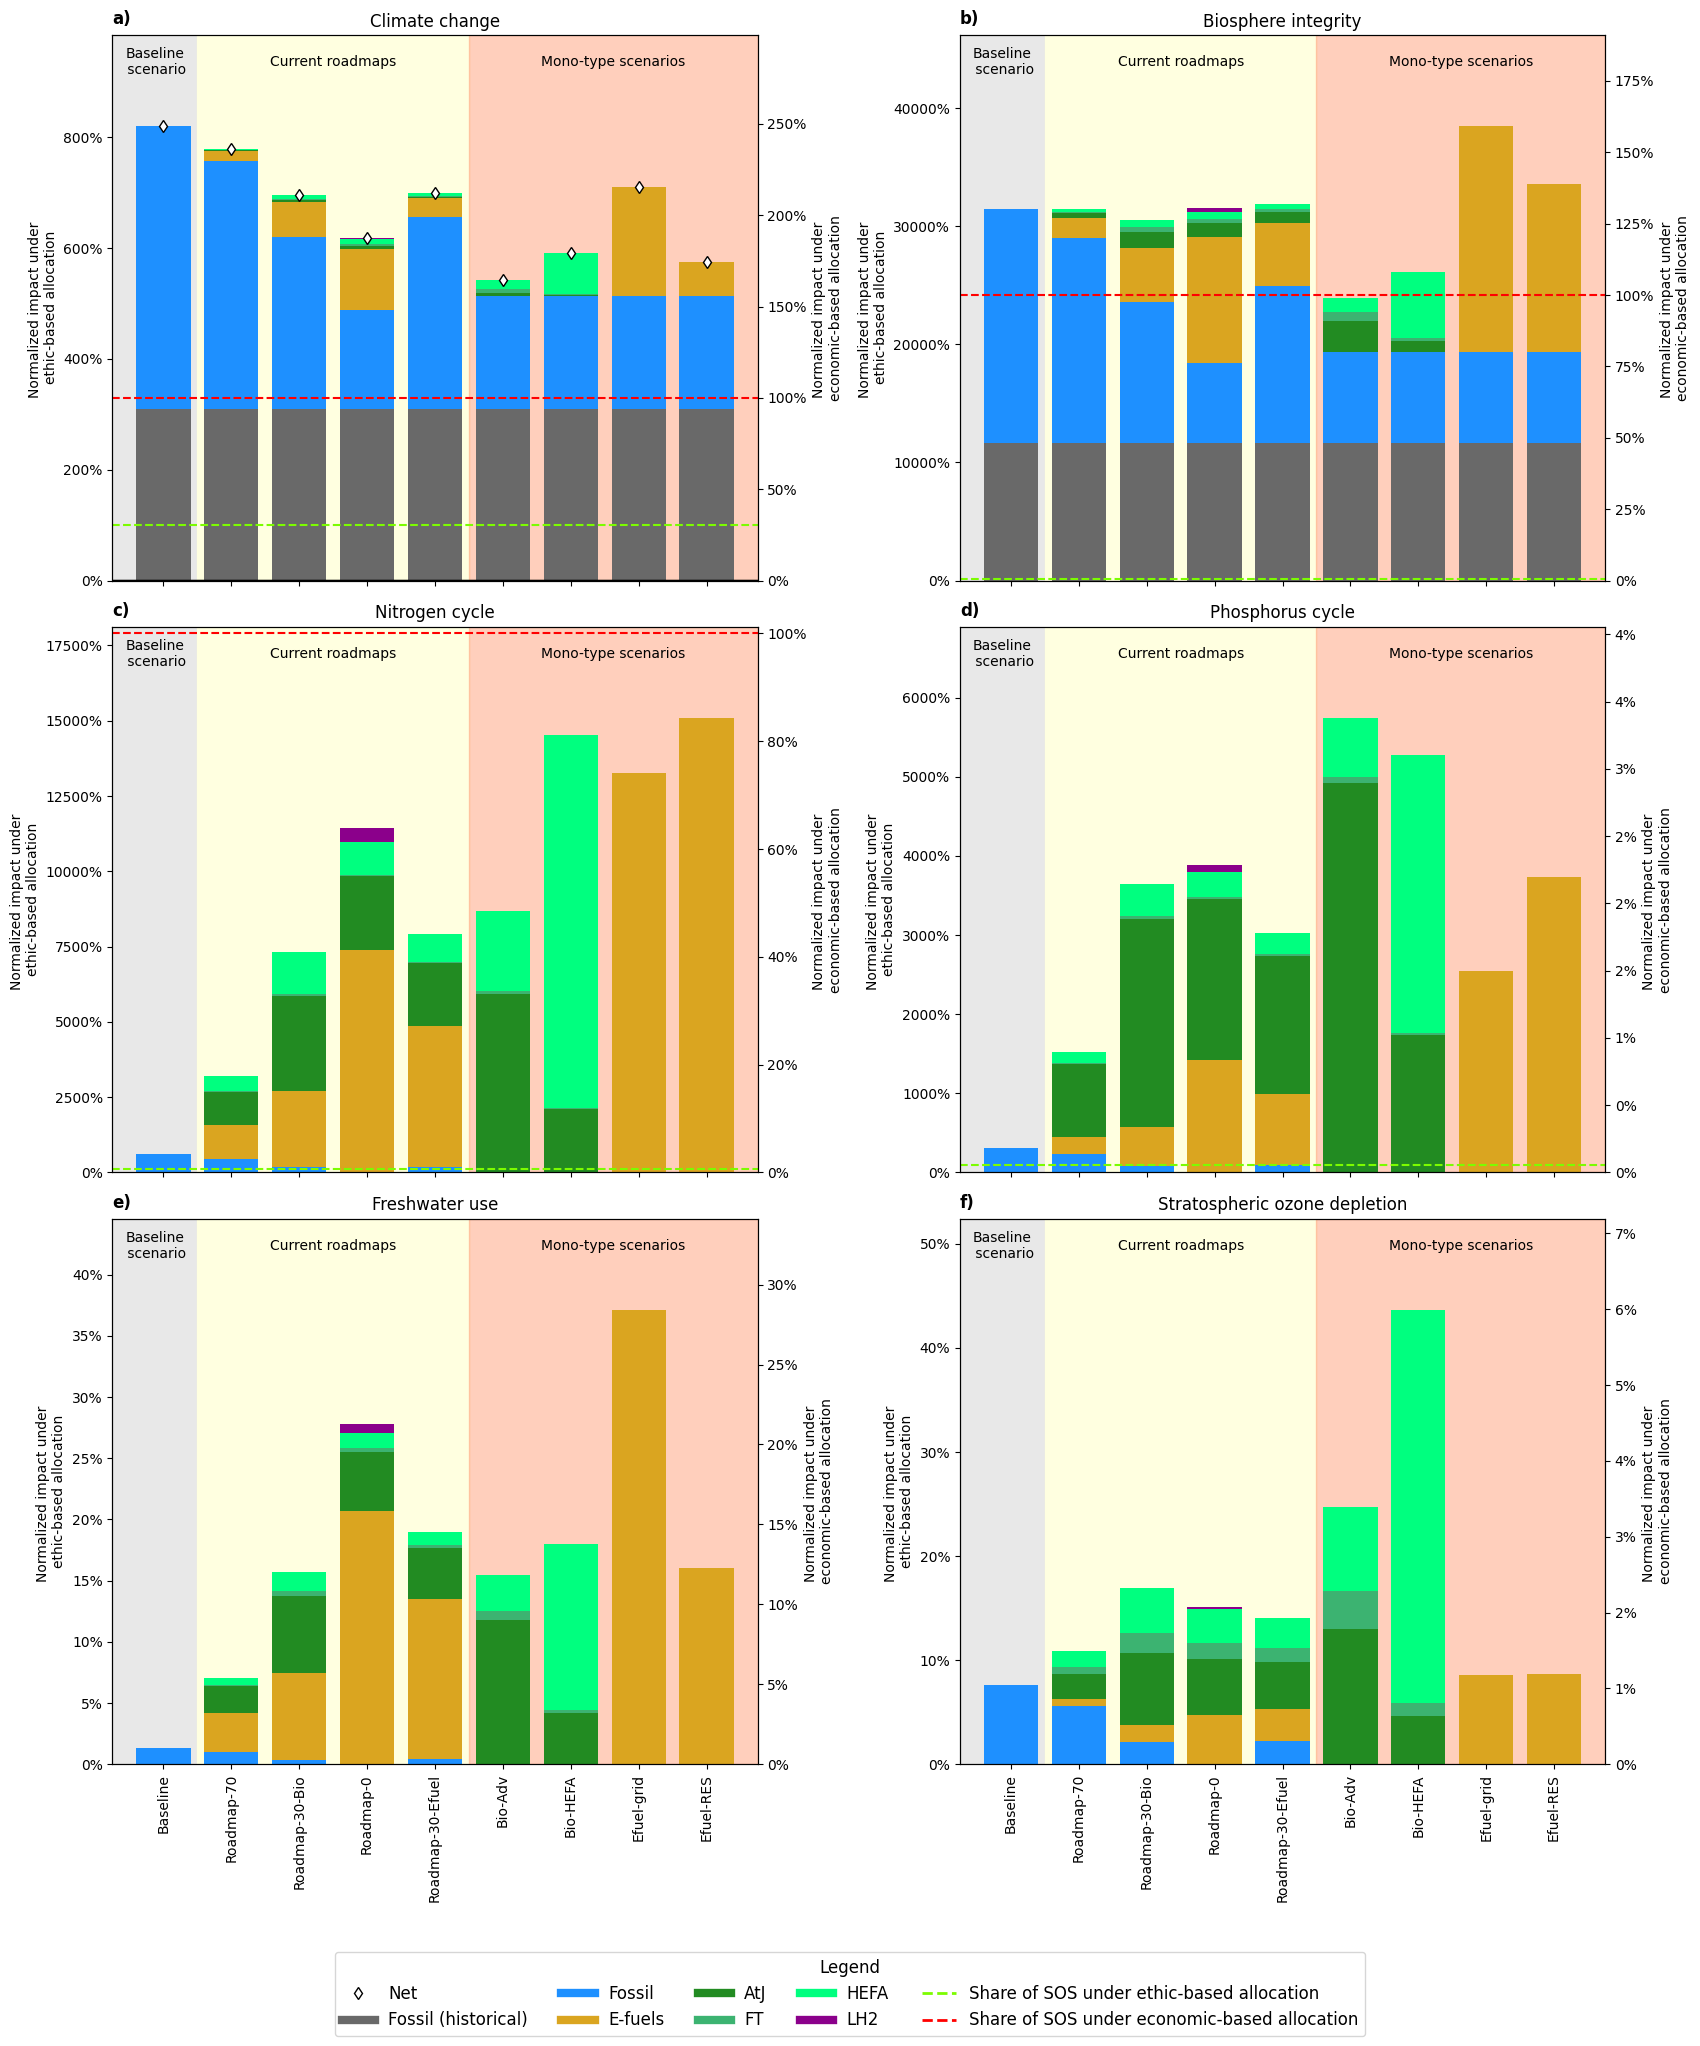

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Define the scenarios and fuel types
scenarios = ['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
fuel_types = ['fk_historical', 'fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
PBs = ['RF', 'BItot', 'N', 'P', 'FWU', 'SOD']
impact_name=['Climate change', 'Biosphere integrity', 'Nitrogen cycle', 'Phosphorus cycle', 'Freshwater use', 'Stratospheric ozone depletion']
colors = ['dimgrey', 'dodgerblue', 'goldenrod', 'forestgreen', 'mediumseagreen', 'springgreen', 'darkmagenta', 'seagreen', 'darkmagenta']
xlabels=['Baseline', 'Roadmap-70', 'Roadmap-30-Bio', 'Roadmap-0', 'Roadmap-30-Efuel', 'Bio-Adv', 'Bio-HEFA', 'Efuel-grid', 'Efuel-RES']

# Initialize the figure and axis
fig, axes = plt.subplots(3, 2, figsize=(17.1, 19.2), sharex=True)

# Add indices (a, b, c...) for each figure
indices = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
for i, ax in enumerate(axes.flatten()):
    ax.text(0, 1.02, f'{indices[i]})', transform=ax.transAxes, size=12, weight='bold')
axes = axes.flatten()

for j, PB in enumerate(PBs):
        # Add colored background for x between 0 and 0.5
    axes[j].axvspan(-0.75, 0.5, color='lightgrey', alpha=0.5)
    axes[j].axvspan(0.5, 4.5, color='lightyellow', alpha=1)
    axes[j].axvspan(4.5, 8.75, color='lightsalmon', alpha=0.5)
    axes[j].set_xlim(-0.75, 8.75)
    bottom_pos = np.zeros(len(scenarios))
    bottom_neg = np.zeros(len(scenarios))
    for i, fuel_type in enumerate(fuel_types):
        values = [dict_AESA[scenario][fuel_type][PB][27] for scenario in scenarios]
        if PB == 'RF':
            pos_values = [v if v > 0 else 0 for v in values]
            neg_values = [v if v < 0 else 0 for v in values]
            axes[j].bar(scenarios, pos_values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            axes[j].bar(scenarios, neg_values, bottom=bottom_neg, label=fuel_type, color=colors[i])
            bottom_pos += np.array(pos_values)
            bottom_neg += np.array(neg_values)
            axes[j].axhline(y=0, color='black')
        else:
            axes[j].bar(scenarios, values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            bottom_pos += np.array(values)
        # axes[j].scatter(np.arange(len(scenarios))-0.25, data_image_ssp2_rcp26[PB].tolist(), color='k', marker='x', s=50, label='IMAGE SSP2-RCP2.6')
        # axes[j].scatter(np.arange(len(scenarios)), data_remind_ssp1_rcp19[PB].tolist(), color='k', marker='o', s=50, label='REMIND SSP1-RCP1.9', facecolors='none', edgecolors='k')
        # axes[j].scatter(np.arange(len(scenarios))+0.25, data_remind_ssp2_npi[PB].tolist(), color='k', marker='s', s=50, label='REMIND SSP2-NPI', facecolors='none', edgecolors='k')
    if PB == 'RF':
        net_sum = bottom_pos + bottom_neg
        axes[j].plot(scenarios, net_sum, marker='d', markerfacecolor='w', linestyle='None', label='Net Sum', markeredgecolor='k')
    axes[j].set_xticklabels(xlabels, rotation=90)
    
   

    axes[j].set_ylabel('Normalized impact under \nethic-based allocation')
    axes[j].set_title(f'{impact_name[j]}')
    axes[j].set_ylim(top=axes[j].get_ylim()[1] * 1.2, bottom=axes[j].get_ylim()[0] * 1.2)
    ax2 = axes[j].twinx()
    ax2.set_ylim(axes[j].get_ylim()[0] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB], axes[j].get_ylim()[1] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB])
    axes[j].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    
    
    ax2.set_ylabel('Normalized impact under \neconomic-based allocation')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    axes[j].axhline(y=1, color='lawngreen', linewidth=1.5, linestyle='--', label='Share of SOS \nunder ethic-based allocation')
    ax2.axhline(y=1, color='red', linewidth=1.5, linestyle='--', label='Share of SOS under \neconomic-based allocation')
    axes[j].text(-0.125, axes[j].get_ylim()[1] *0.95, 'Baseline\n scenario', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(2.5, axes[j].get_ylim()[1] *0.95, 'Current roadmaps', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(6.625, axes[j].get_ylim()[1] *0.95, 'Mono-type scenarios', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')

from matplotlib.container import ErrorbarContainer
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

# Custom legend
custom_bar = [plt.Line2D([0], [0], color='w', lw=6, marker='d', linestyle='None', markeredgecolor='k'),
              plt.Line2D([0], [0], color='dimgrey', lw=6),
              plt.Line2D([0], [0], color='dodgerblue', lw=6),
              plt.Line2D([0], [0], color='goldenrod', lw=6),
              plt.Line2D([0], [0], color='forestgreen', lw=6),
              plt.Line2D([0], [0], color='mediumseagreen', lw=6),
              plt.Line2D([0], [0], color='springgreen', lw=6),
              plt.Line2D([0], [0], color='darkmagenta', lw=6),
              plt.Line2D([0], [0], color='lawngreen', lw=2, linestyle='--'),
              plt.Line2D([0], [0], color='red', lw=2, linestyle='--')]

custom_labels = ['Net','Fossil (historical)', 'Fossil', 'E-fuels', 'AtJ', 'FT', 'HEFA', 'LH2','Share of SOS under ethic-based allocation', 'Share of SOS under economic-based allocation']
fig.legend(custom_bar, custom_labels, loc='center', ncol=5, bbox_to_anchor=(0.5, -0.04), title='Legend', fontsize='large', title_fontsize='large')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('AESA_CC.pdf', bbox_inches='tight', dpi=300)
plt.show()

#### Figure SI7

In [95]:
data_selection_CC=pd.read_excel(r'D:\b.pais\Documents\Articles\0_Article 1\Submit\Nature Com\Data figures\Manuscript_datasets\Data_Fig_2.xlsx', sheet_name='REMIND SSP2-RCP2.6')

In [96]:
data_selection_CC.iloc[:8,0]='Baseline'
data_selection_CC.iloc[8:16,0]='CR1'
data_selection_CC.iloc[16:24,0]='CR2'
data_selection_CC.iloc[24:32,0]='CR3'
data_selection_CC.iloc[32:40,0]='CR4'
data_selection_CC.iloc[40:48,0]='MTS1'
data_selection_CC.iloc[48:56,0]='MTS2'
data_selection_CC.iloc[56:64,0]='MTS3'
data_selection_CC.iloc[64:72,0]='MTS4'

In [97]:
data_selection_CC.set_index(data_selection_CC.columns[0], inplace=True)

In [100]:
data_selection_CC = data_selection_CC[data_selection_CC.iloc[:, 0] == 'total']
data_selection_CC = data_selection_CC.iloc[:, :7]
labels=['Unnamed: 1', 'RF', 'BItot', 'N', 'P', 'FWU', 'SOD']
data_selection_CC.columns = labels
data_selection_CC

,Unnamed: 1,RF,BItot,N,P,FWU,SOD
Unnamed: 0,,,,,,,
Baseline,total,8.204661,314.934468,6.010644,3.117822,0.013692,0.076163
CR1,total,7.538186,406.269401,34.208867,20.797306,0.075710,0.117164
CR2,total,6.031333,559.386979,79.927783,52.390001,0.172201,0.192572
CR3,total,4.944107,492.724882,119.440160,51.271968,0.289256,0.169571
CR4,total,6.295256,484.225846,83.628083,40.791324,0.199644,0.155506
MTS1,total,3.297165,701.164889,98.998248,87.386038,0.182190,0.290562
MTS2,total,4.894190,404.869830,167.630326,120.748805,0.213183,0.485901
MTS3,total,7.103400,384.927581,132.671901,25.461496,0.371419,0.086297
MTS4,total,5.747043,335.870812,150.995302,37.305528,0.160615,0.086311


C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1884691777.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1884691777.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1884691777.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1884691777.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais

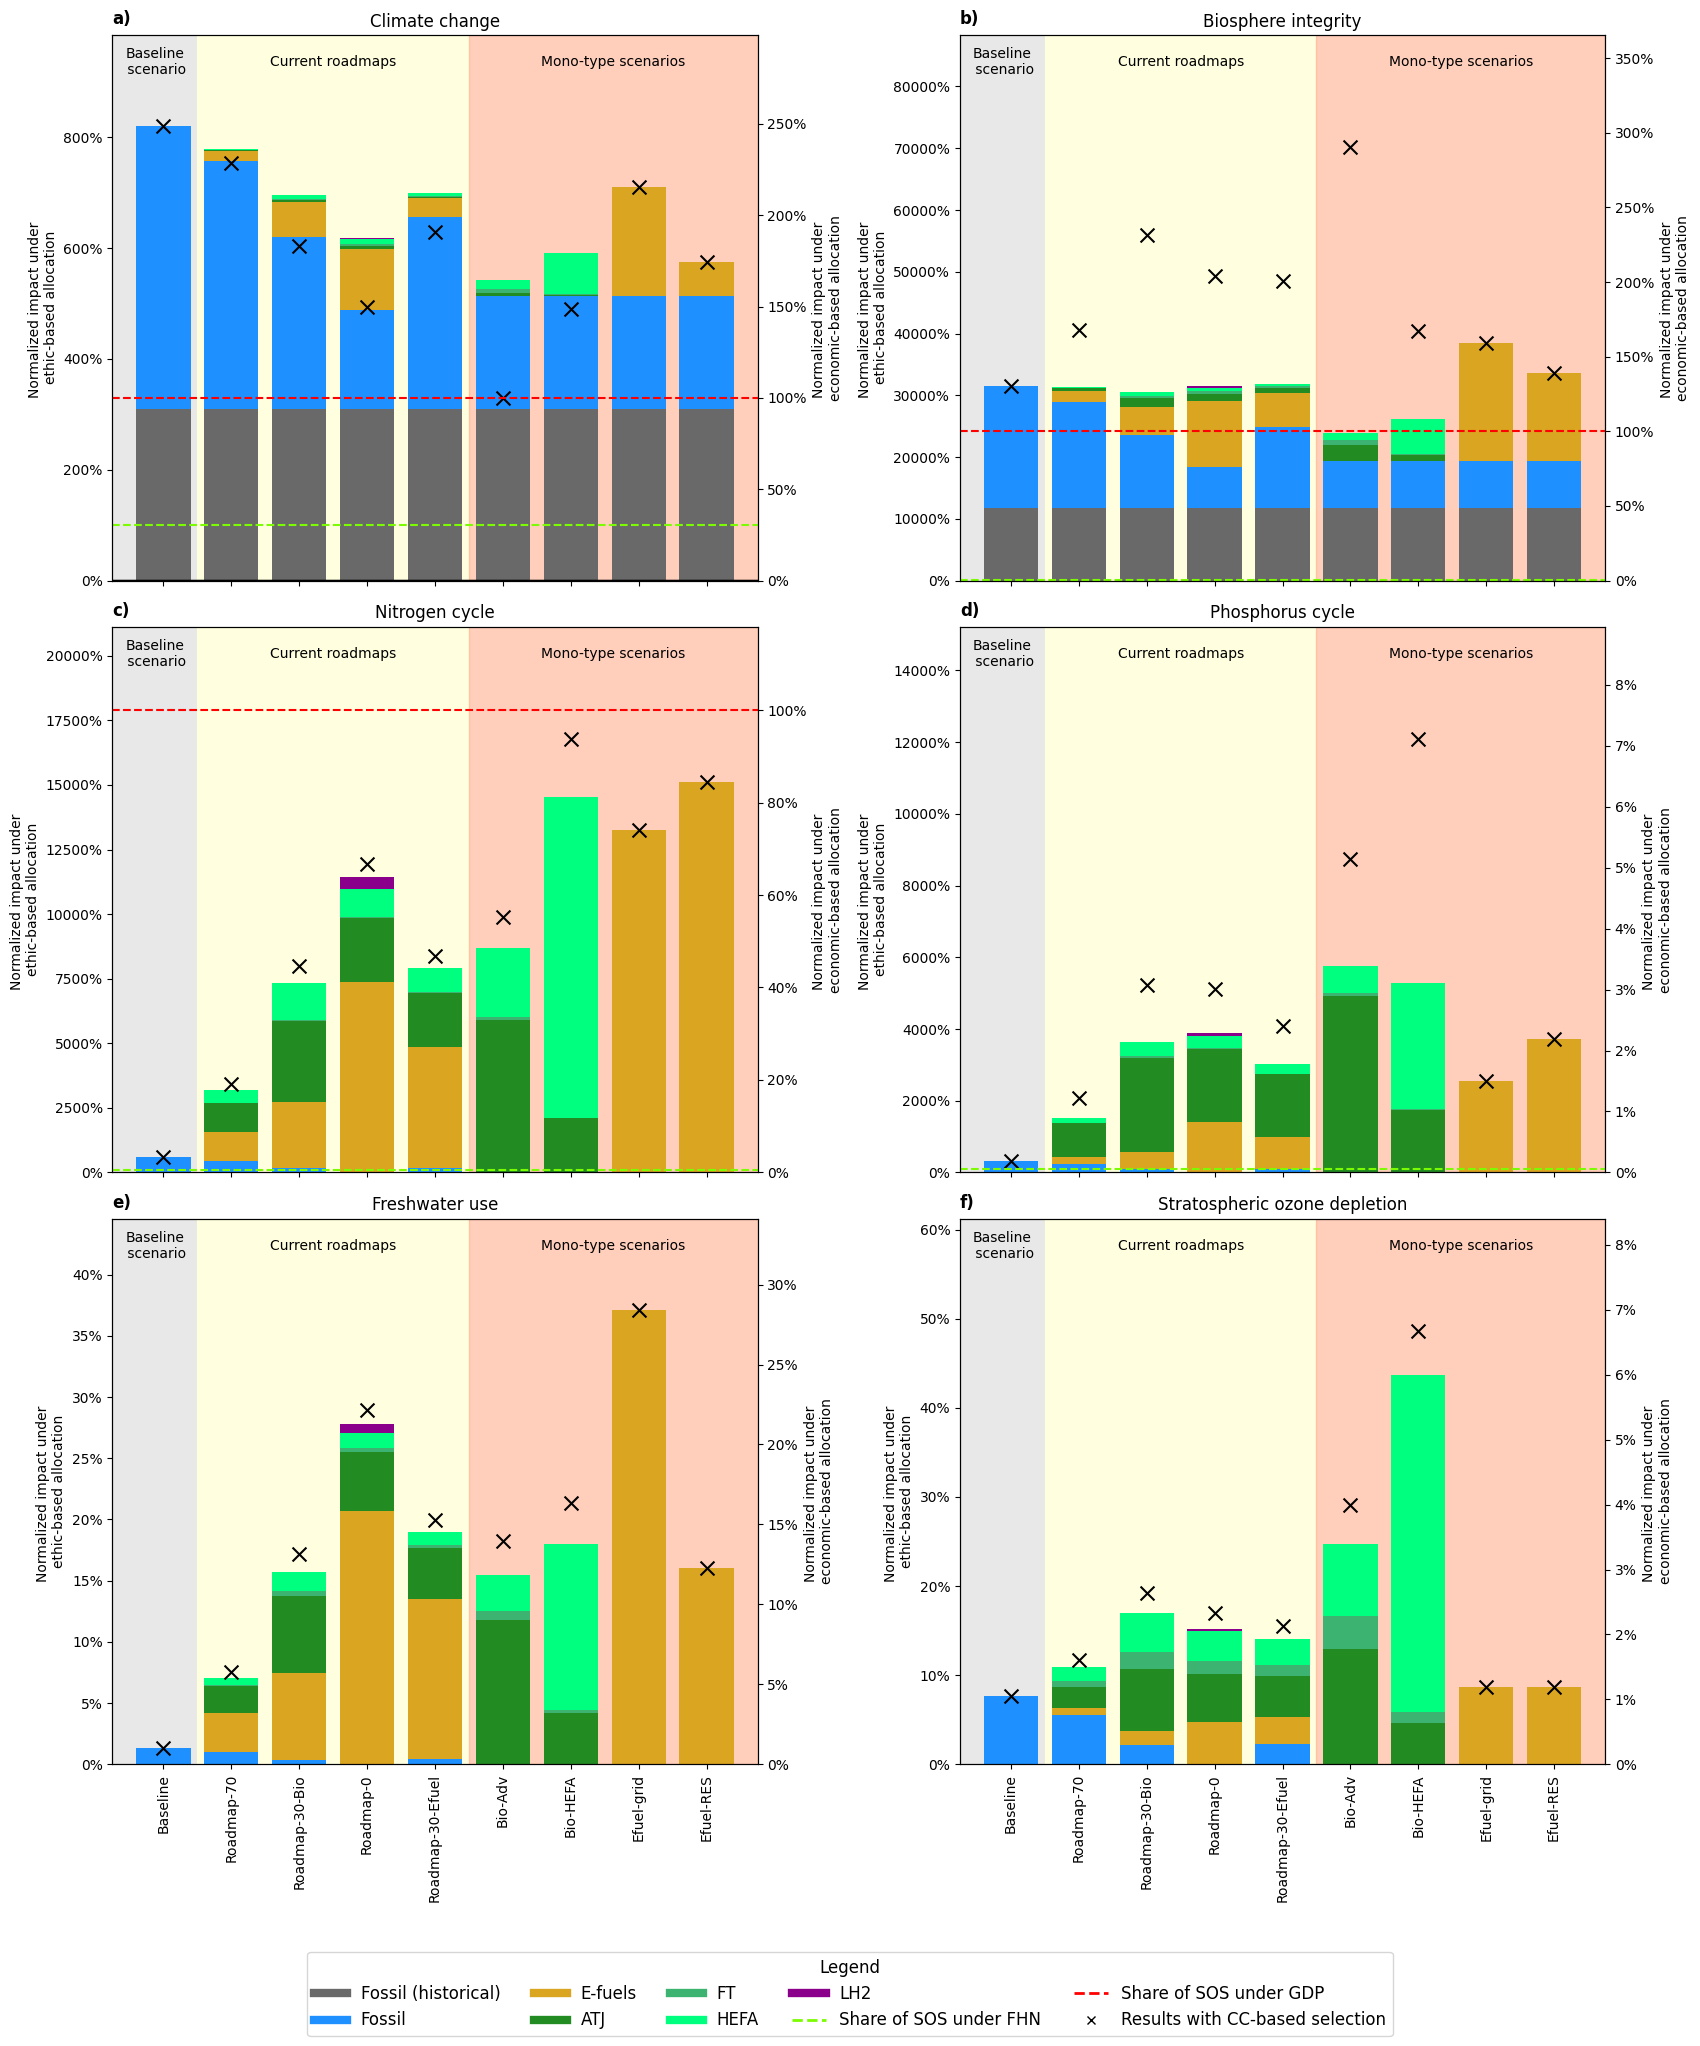

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Define the scenarios and fuel types
scenarios = ['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
fuel_types = ['fk_historical', 'fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
PBs = ['RF', 'BItot', 'N', 'P', 'FWU', 'SOD']
impact_name=['Climate change', 'Biosphere integrity', 'Nitrogen cycle', 'Phosphorus cycle', 'Freshwater use', 'Stratospheric ozone depletion']
colors = ['dimgrey', 'dodgerblue', 'goldenrod', 'forestgreen', 'mediumseagreen', 'springgreen', 'darkmagenta', 'seagreen', 'darkmagenta']
xlabels=['Baseline', 'Roadmap-70', 'Roadmap-30-Bio', 'Roadmap-0', 'Roadmap-30-Efuel', 'Bio-Adv', 'Bio-HEFA', 'Efuel-grid', 'Efuel-RES']

# Initialize the figure and axis
fig, axes = plt.subplots(3, 2, figsize=(17.1, 19.2), sharex=True)

# Add indices (a, b, c...) for each figure
indices = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
for i, ax in enumerate(axes.flatten()):
    ax.text(0, 1.02, f'{indices[i]})', transform=ax.transAxes, size=12, weight='bold')
axes = axes.flatten()

for j, PB in enumerate(PBs):
        # Add colored background for x between 0 and 0.5
    axes[j].axvspan(-0.75, 0.5, color='lightgrey', alpha=0.5)
    axes[j].axvspan(0.5, 4.5, color='lightyellow', alpha=1)
    axes[j].axvspan(4.5, 8.75, color='lightsalmon', alpha=0.5)
    
    axes[j].set_xlim(-0.75, 8.75)
    bottom_pos = np.zeros(len(scenarios))
    bottom_neg = np.zeros(len(scenarios))
    for i, fuel_type in enumerate(fuel_types):
        values = [dict_AESA[scenario][fuel_type][PB][27] for scenario in scenarios]
        if PB == 'RF':
            pos_values = [v if v > 0 else 0 for v in values]
            neg_values = [v if v < 0 else 0 for v in values]
            axes[j].bar(scenarios, pos_values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            axes[j].bar(scenarios, neg_values, bottom=bottom_neg, label=fuel_type, color=colors[i])
            bottom_pos += np.array(pos_values)
            bottom_neg += np.array(neg_values)
            axes[j].axhline(y=0, color='black')
        else:
            axes[j].bar(scenarios, values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            bottom_pos += np.array(values)

    #if PB == 'RF':
    #    net_sum = bottom_pos + bottom_neg
    #    axes[j].plot(scenarios, net_sum, marker='d', color='black', linestyle='None', label='Net Sum')
   
    axes[j].scatter(scenarios, data_selection_CC[PB], color='k', marker='x', s=100, label='Selected scenarios')

    axes[j].set_ylabel('Normalized impact under \nethic-based allocation')
    axes[j].set_title(f'{impact_name[j]}')
    axes[j].set_ylim(top=axes[j].get_ylim()[1] * 1.2, bottom=axes[j].get_ylim()[0] * 1.2)
    ax2 = axes[j].twinx()
    ax2.set_ylim(axes[j].get_ylim()[0] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB], axes[j].get_ylim()[1] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB])
    
    axes[j].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    
    axes[j].set_xticklabels(xlabels, rotation=90)
    ax2.set_ylabel('Normalized impact under \neconomic-based allocation')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    axes[j].axhline(y=1, color='lawngreen', linewidth=1.5, linestyle='--', label='Share of SOS under FHN')
    ax2.axhline(y=1, color='red', linewidth=1.5, linestyle='--', label='Share of SOS under GDP')
    axes[j].text(-0.125, axes[j].get_ylim()[1] *0.95, 'Baseline\n scenario', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(2.5, axes[j].get_ylim()[1] *0.95, 'Current roadmaps', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(6.625, axes[j].get_ylim()[1] *0.95, 'Mono-type scenarios', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')

# Custom legend
custom_bar= [plt.Line2D([0], [0], color='dimgrey', lw=6),
             plt.Line2D([0], [0], color='dodgerblue', lw=6),
             plt.Line2D([0], [0], color='goldenrod', lw=6),
             plt.Line2D([0], [0], color='forestgreen', lw=6),
             plt.Line2D([0], [0], color='mediumseagreen', lw=6),
             plt.Line2D([0], [0], color='springgreen', lw=6),
             plt.Line2D([0], [0], color='darkmagenta', lw=6),
             #plt.Line2D([0], [0], color='k', marker='d', linestyle='None'),
             plt.Line2D([0], [0], color='lawngreen', lw=2, linestyle='--'),
             plt.Line2D([0], [0], color='red', lw=2, linestyle='--'),
             plt.Line2D([0], [0], color='k', marker='x', linestyle='None')]

custom_labels = ['Fossil (historical)', 'Fossil', 'E-fuels', 'ATJ', 'FT', 'HEFA', 'LH2','Share of SOS under FHN', 'Share of SOS under GDP', 'Results with CC-based selection']
fig.legend(custom_bar, custom_labels, loc='center', ncol=5, bbox_to_anchor=(0.5, -0.04), title='Legend', fontsize='large', title_fontsize='large')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('FigSI7.svg', bbox_inches='tight', dpi=300)
plt.show()



#### Figure SI8

In [521]:
data_cagr28_tech15=pd.read_excel(r'D:\b.pais\Documents\Articles\0_Article 1\Submit\Nature Com\Data figures\SI_datasets\Data_Fig_SI8.xlsx', sheet_name='Min')
data_cagr42_tech09=pd.read_excel(r'D:\b.pais\Documents\Articles\0_Article 1\Submit\Nature Com\Data figures\SI_datasets\Data_Fig_SI8.xlsx', sheet_name='Max')
dfs=[data_cagr28_tech15, data_cagr42_tech09]

In [522]:
for df in dfs:
    df.iloc[:8,0]='Baseline'
    df.iloc[8:16,0]='CR1'
    df.iloc[16:24,0]='CR2'
    df.iloc[24:32,0]='CR3'
    df.iloc[32:40,0]='CR4'
    df.iloc[40:48,0]='MTS1'
    df.iloc[48:56,0]='MTS2'
    df.iloc[56:64,0]='MTS3'
    df.iloc[64:72,0]='MTS4'

In [523]:
data_cagr28_tech15 = data_cagr28_tech15[data_cagr28_tech15.iloc[:, 1] == 'total']
data_cagr42_tech09 = data_cagr42_tech09[data_cagr42_tech09.iloc[:, 1] == 'total']

In [524]:
data_cagr42_tech09.drop(columns=['Unnamed: 1'], inplace=True)
data_cagr28_tech15.drop(columns=['Unnamed: 1'], inplace=True)
data_cagr42_tech09.set_index(data_cagr42_tech09.columns[0], inplace=True)
data_cagr28_tech15.set_index(data_cagr28_tech15.columns[0], inplace=True)

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\4014339723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cagr42_tech09.drop(columns=['Unnamed: 1'], inplace=True)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\4014339723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cagr28_tech15.drop(columns=['Unnamed: 1'], inplace=True)


In [525]:
data_cagr28_tech15

,RF,BItot,N,P,FWU,SOD
Unnamed: 0,,,,,,
Baseline,7.548990,289.090591,4.750165,2.463990,0.010820,0.060191
CR1,7.005021,360.620295,27.035000,16.435948,0.059833,0.092594
CR2,5.773312,480.085600,63.166300,41.403407,0.136089,0.152188
CR3,4.859363,425.337233,94.392622,40.519834,0.228597,0.134011
CR4,5.964252,420.020608,66.090618,32.237064,0.157777,0.122895
MTS1,3.462654,586.474005,78.237539,69.060501,0.143983,0.229629
MTS2,4.792081,354.855369,132.476932,95.426834,0.168477,0.384003
MTS3,6.688588,344.779947,104.849563,20.122021,0.293529,0.068199
MTS4,5.503275,301.730000,119.330403,29.482267,0.126933,0.068211


C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\284830504.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[j].plot([x, x], [data_cagr28_tech15[PB][x], data_cagr42_tech09[PB][x]], color='k', linestyle='-')
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\284830504.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\284830504.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[j].plot([x, x], [data_cagr28_tech15[PB][x

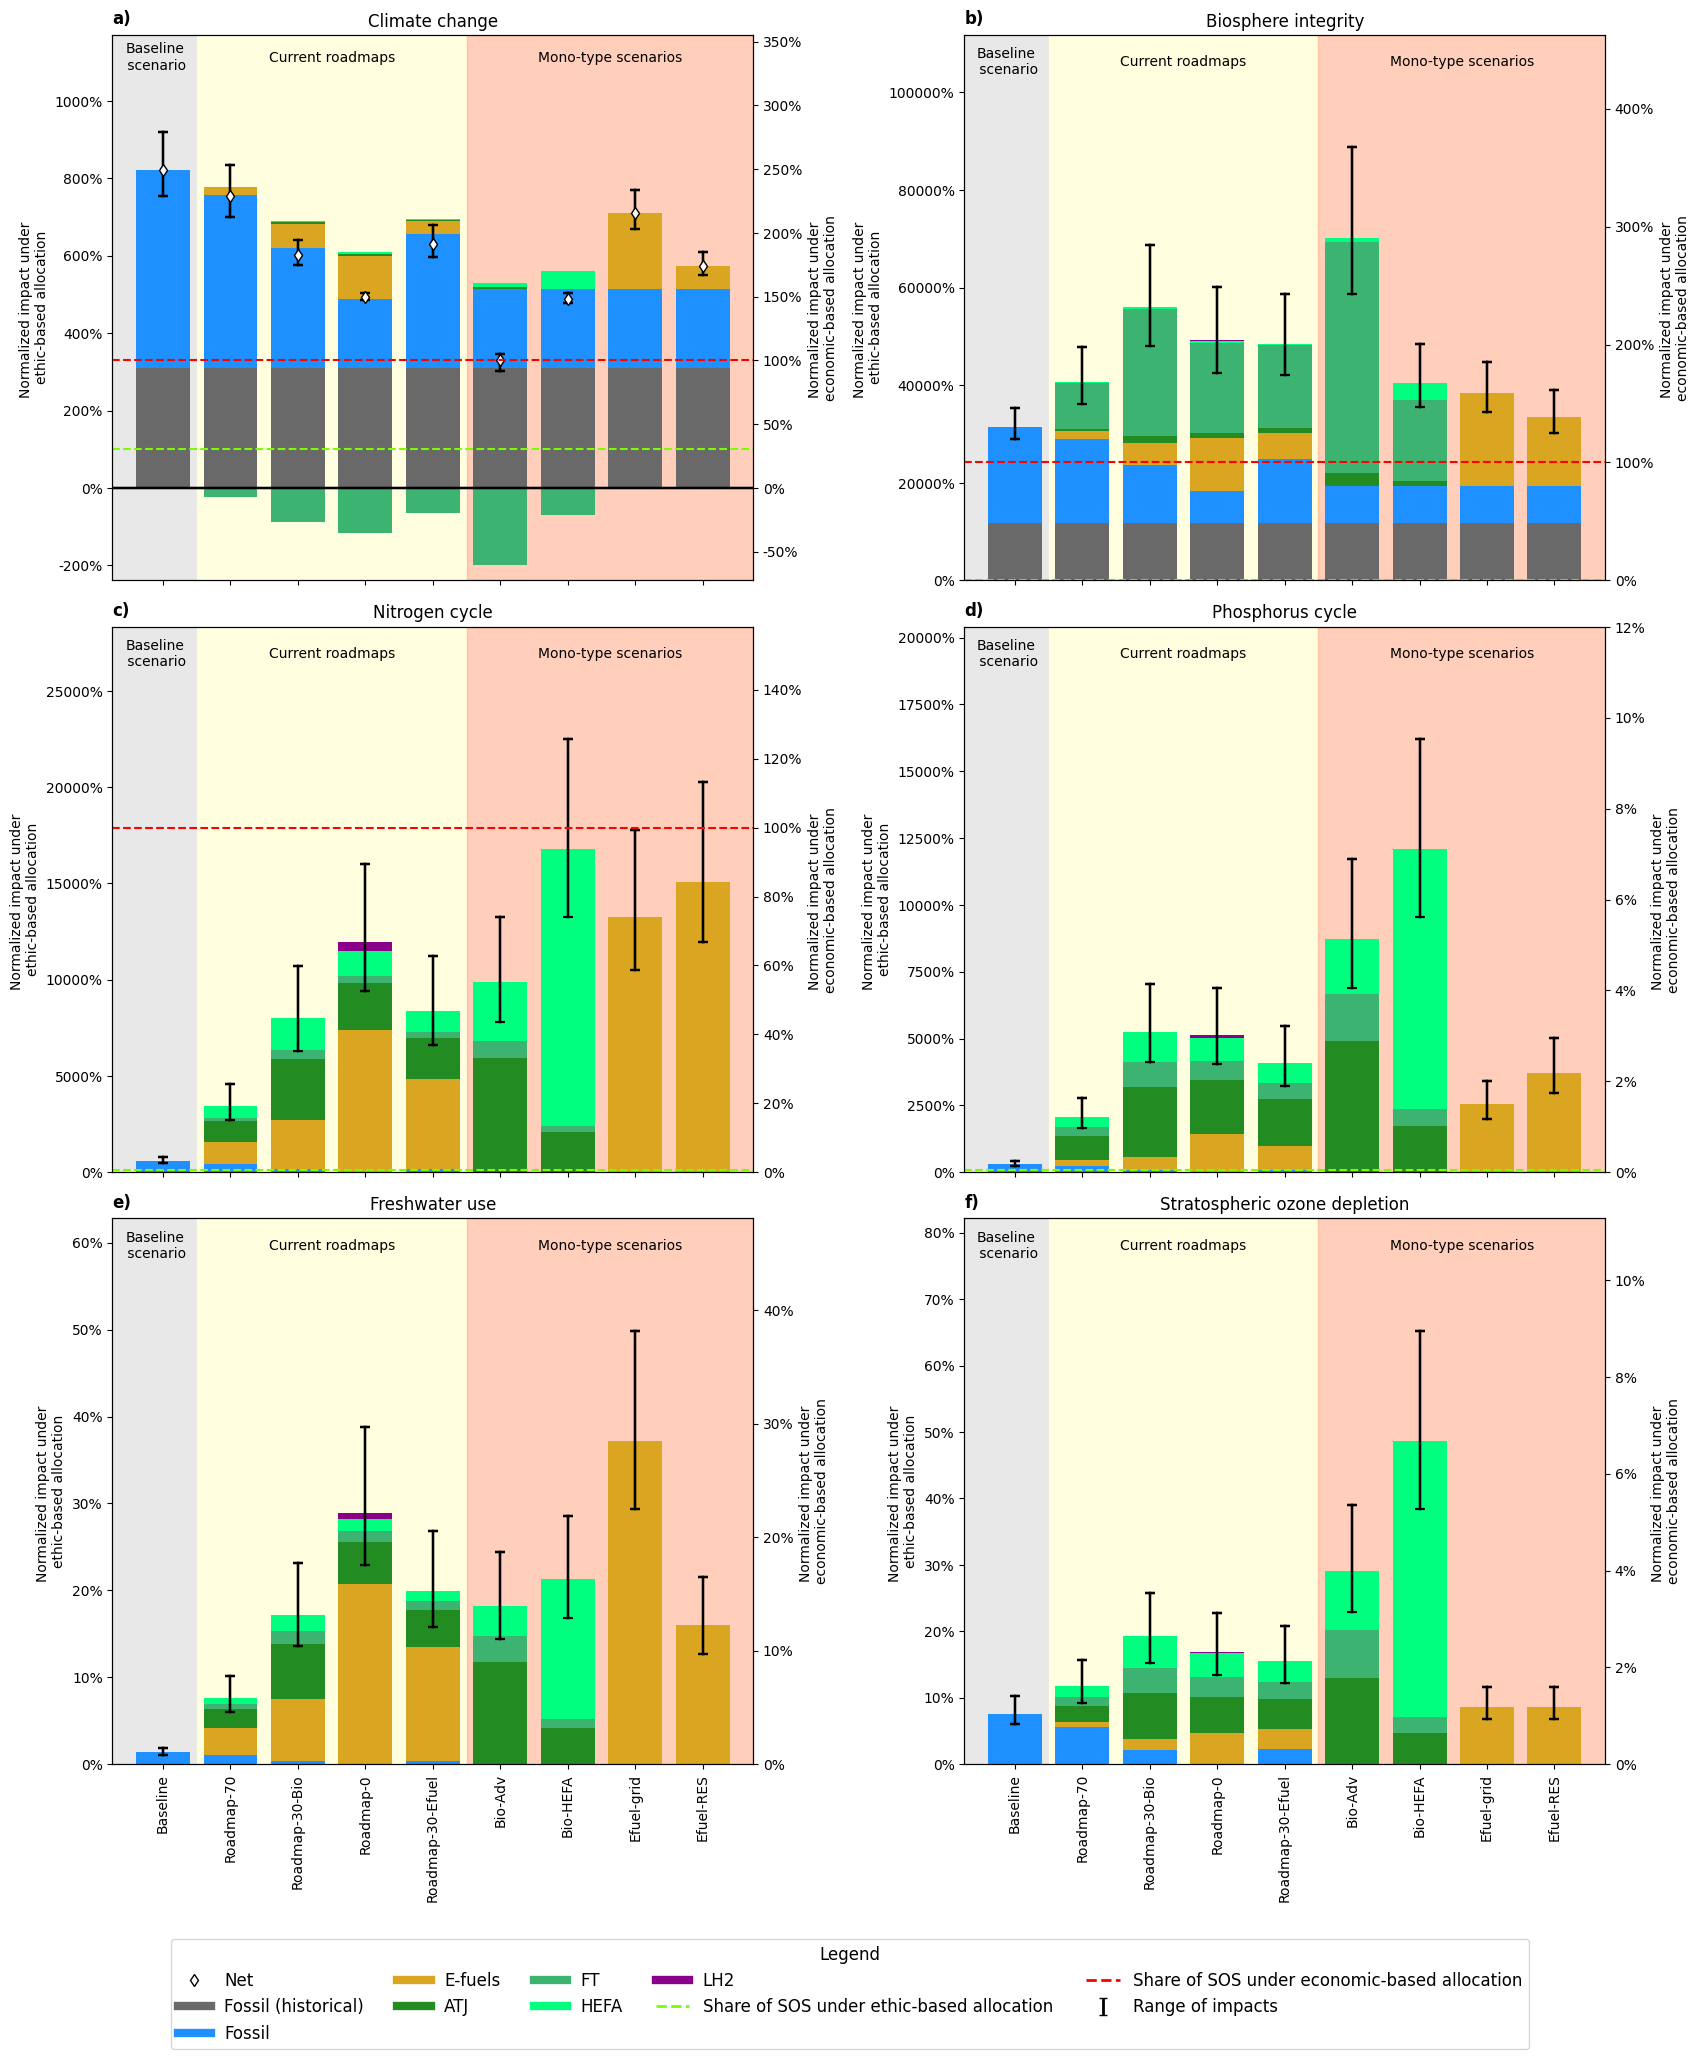

In [529]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Define the scenarios and fuel types
scenarios = ['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
fuel_types = ['fk_historical', 'fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
PBs = ['RF', 'BItot', 'N', 'P', 'FWU', 'SOD']
impact_name=['Climate change', 'Biosphere integrity', 'Nitrogen cycle', 'Phosphorus cycle', 'Freshwater use', 'Stratospheric ozone depletion']
colors = ['dimgrey', 'dodgerblue', 'goldenrod', 'forestgreen', 'mediumseagreen', 'springgreen', 'darkmagenta', 'seagreen', 'darkmagenta']
xlabels=['Baseline', 'Roadmap-70', 'Roadmap-30-Bio', 'Roadmap-0', 'Roadmap-30-Efuel', 'Bio-Adv', 'Bio-HEFA', 'Efuel-grid', 'Efuel-RES']

# Initialize the figure and axis
fig, axes = plt.subplots(3, 2, figsize=(17.1, 19.2), sharex=True)

# Add indices (a, b, c...) for each figure
indices = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
for i, ax in enumerate(axes.flatten()):
    ax.text(0, 1.02, f'{indices[i]})', transform=ax.transAxes, size=12, weight='bold')
axes = axes.flatten()

for j, PB in enumerate(PBs):
        # Add colored background for x between 0 and 0.5
    axes[j].axvspan(-0.75, 0.5, color='lightgrey', alpha=0.5)
    axes[j].axvspan(0.5, 4.5, color='lightyellow', alpha=1)
    axes[j].axvspan(4.5, 8.75, color='lightsalmon', alpha=0.5)
    axes[j].set_xlim(-0.75, 8.75)
    bottom_pos = np.zeros(len(scenarios))
    bottom_neg = np.zeros(len(scenarios))
    for i, fuel_type in enumerate(fuel_types):
        values = [dict_AESA[scenario][fuel_type][PB][27] for scenario in scenarios]
        if PB == 'RF':
            pos_values = [v if v > 0 else 0 for v in values]
            neg_values = [v if v < 0 else 0 for v in values]
            axes[j].bar(scenarios, pos_values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            axes[j].bar(scenarios, neg_values, bottom=bottom_neg, label=fuel_type, color=colors[i])
            bottom_pos += np.array(pos_values)
            bottom_neg += np.array(neg_values)
            axes[j].axhline(y=0, color='black')
        else:
            axes[j].bar(scenarios, values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            bottom_pos += np.array(values)
        axes[j].scatter(np.arange(len(scenarios)), data_cagr28_tech15[PB].tolist(), color='k', marker='_', s=50, label='LTG, HEG')
        axes[j].scatter(np.arange(len(scenarios)), data_cagr42_tech09[PB].tolist(), color='k', marker='_', s=50, label='HTG, LEG')
        for x in range(len(scenarios)):
            axes[j].plot([x, x], [data_cagr28_tech15[PB][x], data_cagr42_tech09[PB][x]], color='k', linestyle='-')
    if PB == 'RF':
        net_sum = bottom_pos + bottom_neg
        axes[j].plot(scenarios, net_sum, marker='d', markerfacecolor='w', linestyle='None', label='Net Sum', markeredgecolor='k')
    axes[j].set_xticklabels(xlabels, rotation=90)
    
   

    axes[j].set_ylabel('Normalized impact under \nethic-based allocation')
    axes[j].set_title(f'{impact_name[j]}')
    axes[j].set_ylim(top=axes[j].get_ylim()[1] * 1.2, bottom=axes[j].get_ylim()[0] * 1.2)
    ax2 = axes[j].twinx()
    ax2.set_ylim(axes[j].get_ylim()[0] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB], axes[j].get_ylim()[1] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB])
    axes[j].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    
    
    ax2.set_ylabel('Normalized impact under \neconomic-based allocation')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    axes[j].axhline(y=1, color='lawngreen', linewidth=1.5, linestyle='--', label='Share of SOS under FHN')
    ax2.axhline(y=1, color='red', linewidth=1.5, linestyle='--', label='Share of SOS under GDP')
    axes[j].text(-0.125, axes[j].get_ylim()[1] *0.95, 'Baseline\n scenario', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(2.5, axes[j].get_ylim()[1] *0.95, 'Current roadmaps', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(6.625, axes[j].get_ylim()[1] *0.95, 'Mono-type scenarios', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')


from matplotlib.container import ErrorbarContainer
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
line = Line2D([],[], ls="none", color='black', linewidth=3)
barline = LineCollection(np.empty((2,2,2)), color='black', linewidth=2)
err = ErrorbarContainer((line, [line], [barline]), has_xerr=False, has_yerr=True, label='Error bar')
# Custom legend
custom_bar = [plt.Line2D([0], [0], color='w', lw=6, marker='d', linestyle='None', markeredgecolor='k'),
              plt.Line2D([0], [0], color='dimgrey', lw=6),
              plt.Line2D([0], [0], color='dodgerblue', lw=6),
              plt.Line2D([0], [0], color='goldenrod', lw=6),
              plt.Line2D([0], [0], color='forestgreen', lw=6),
              plt.Line2D([0], [0], color='mediumseagreen', lw=6),
              plt.Line2D([0], [0], color='springgreen', lw=6),
              plt.Line2D([0], [0], color='darkmagenta', lw=6),
            
              plt.Line2D([0], [0], color='lawngreen', lw=2, linestyle='--'),
              plt.Line2D([0], [0], color='red', lw=2, linestyle='--'),
              err]  # Error bar

custom_labels = ['Net','Fossil (historical)', 'Fossil', 'E-fuels', 'ATJ', 'FT', 'HEFA', 'LH2','Share of SOS under ethic-based allocation', 'Share of SOS under economic-based allocation', 'Range of impacts']
fig.legend(custom_bar, custom_labels, loc='center', ncol=5, bbox_to_anchor=(0.5, -0.04), title='Legend', fontsize='large', title_fontsize='large')


# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('FigSI8.pdf', bbox_inches='tight', dpi=300)
plt.show()



#### Figure SI9

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1537915532.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1537915532.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1537915532.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1537915532.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais

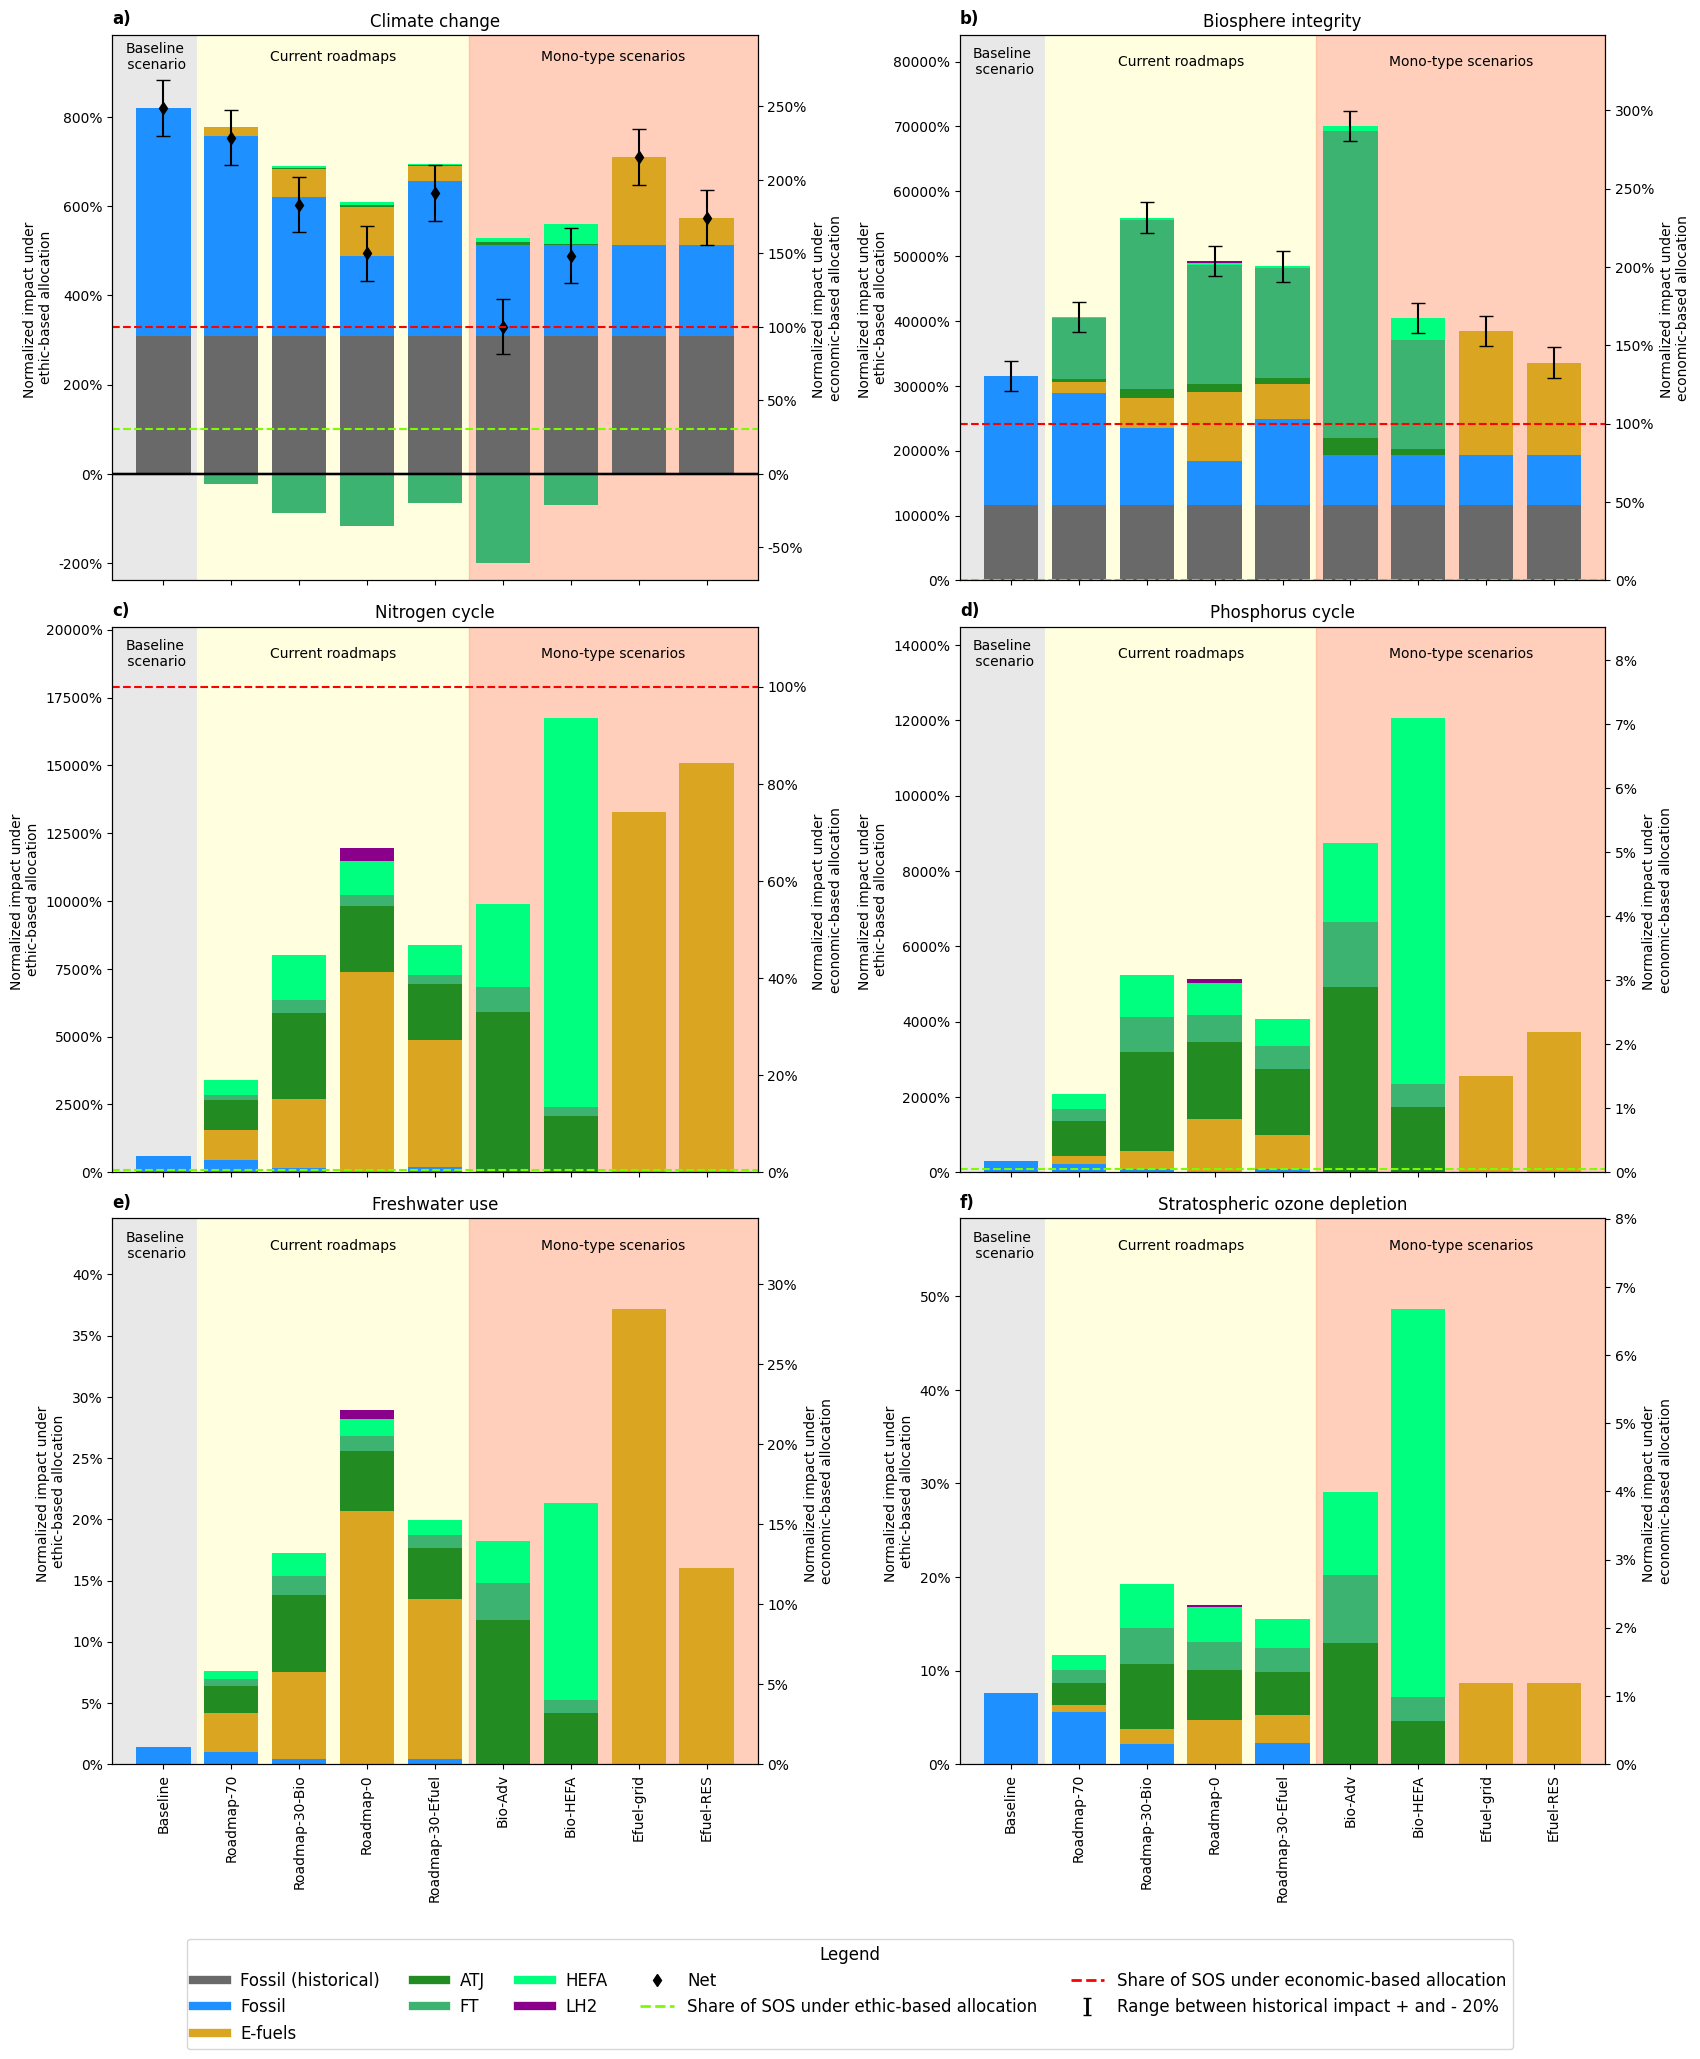

In [531]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Define the scenarios and fuel types
scenarios = ['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
fuel_types = ['fk_historical', 'fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
PBs = ['RF', 'BItot', 'N', 'P',  'FWU', 'SOD']
impact_name=['Climate change', 'Biosphere integrity', 'Nitrogen cycle', 'Phosphorus cycle',  'Freshwater use', 'Stratospheric ozone depletion']
colors = ['dimgrey', 'dodgerblue', 'goldenrod', 'forestgreen', 'mediumseagreen', 'springgreen', 'darkmagenta', 'seagreen', 'darkmagenta']
xlabels=['Baseline', 'Roadmap-70', 'Roadmap-30-Bio', 'Roadmap-0', 'Roadmap-30-Efuel', 'Bio-Adv', 'Bio-HEFA', 'Efuel-grid', 'Efuel-RES']

# Initialize the figure and axis
fig, axes = plt.subplots(3, 2, figsize=(17.1, 19.2), sharex=True)

# Add indices (a, b, c...) for each figure
indices = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
for i, ax in enumerate(axes.flatten()):
    ax.text(0, 1.02, f'{indices[i]})', transform=ax.transAxes, size=12, weight='bold')
axes = axes.flatten()

for j, PB in enumerate(PBs):
        # Add colored background for x between 0 and 0.5
    axes[j].axvspan(-0.75, 0.5, color='lightgrey', alpha=0.5)
    axes[j].axvspan(0.5, 4.5, color='lightyellow', alpha=1)
    axes[j].axvspan(4.5, 8.75, color='lightsalmon', alpha=0.5)
    
    axes[j].set_xlim(-0.75, 8.75)
    bottom_pos = np.zeros(len(scenarios))
    bottom_neg = np.zeros(len(scenarios))
    for i, fuel_type in enumerate(fuel_types):
        values = [dict_AESA[scenario][fuel_type][PB][27] for scenario in scenarios]
        if PB == 'RF':
            pos_values = [v if v > 0 else 0 for v in values]
            neg_values = [v if v < 0 else 0 for v in values]
            axes[j].bar(scenarios, pos_values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            axes[j].bar(scenarios, neg_values, bottom=bottom_neg, label=fuel_type, color=colors[i])
            bottom_pos += np.array(pos_values)
            bottom_neg += np.array(neg_values)
            axes[j].axhline(y=0, color='black')
        else:
            axes[j].bar(scenarios, values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            bottom_pos += np.array(values)

    if PB == 'RF':
        net_sum = bottom_pos + bottom_neg
        if len(scenarios) == len(net_sum):
            axes[j].plot(scenarios, net_sum, marker='d', color='black', linestyle='None', label='Net Sum')
        else:
            print(f"Length mismatch: len(scenarios)={len(scenarios)}, len(net_sum)={len(net_sum)}")
   

    axes[j].set_ylabel('Normalized impact under \nethic-based allocation')
    axes[j].set_title(f'{impact_name[j]}')
    axes[j].set_ylim(top=axes[j].get_ylim()[1] * 1.2, bottom=axes[j].get_ylim()[0] * 1.2)
    ax2 = axes[j].twinx()
    ax2.set_ylim(axes[j].get_ylim()[0] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB], axes[j].get_ylim()[1] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB])
    axes[j].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    
    
    ax2.set_ylabel('Normalized impact under \neconomic-based allocation')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    axes[j].axhline(y=1, color='lawngreen', linewidth=1.5, linestyle='--', label='Share of SOS under FHN')
    ax2.axhline(y=1, color='red', linewidth=1.5, linestyle='--', label='Share of SOS under GDP')
    axes[j].text(-0.125, axes[j].get_ylim()[1] *0.95, 'Baseline\n scenario', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(2.5, axes[j].get_ylim()[1] *0.95, 'Current roadmaps', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(6.625, axes[j].get_ylim()[1] *0.95, 'Mono-type scenarios', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    # Add error bars centered in the net of each bar
    if PB == 'RF':
        fk_historical_values = [dict_AESA[scenario]['fk_historical'][PB][27] for scenario in scenarios]
        error = [0.2 * abs(v) for v in fk_historical_values]
        net_sum = bottom_pos + bottom_neg
        axes[j].errorbar(scenarios, net_sum, yerr=error, fmt='none', ecolor='black', capsize=5)
    elif PB == 'BItot' or PB == 'LSCcumul':
        fk_historical_values = [dict_AESA[scenario]['fk_historical'][PB][27] for scenario in scenarios]
        error = [0.2 * abs(v) for v in fk_historical_values]
        center_of_error_bars= [bottom_pos[i] for i in range(len(bottom_pos))]
        axes[j].errorbar(scenarios, center_of_error_bars, yerr=error, fmt='none', ecolor='black', capsize=5)
    axes[j].set_xticklabels(xlabels, rotation=90)

from matplotlib.container import ErrorbarContainer
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
line = Line2D([],[], ls="none", color='black', linewidth=3)
barline = LineCollection(np.empty((2,2,2)), color='black', linewidth=2)
err = ErrorbarContainer((line, [line], [barline]), has_xerr=False, has_yerr=True, label='Error bar')
custom_bar= [plt.Line2D([0], [0], color='dimgrey', lw=6),
             plt.Line2D([0], [0], color='dodgerblue', lw=6),
             plt.Line2D([0], [0], color='goldenrod', lw=6),
             plt.Line2D([0], [0], color='forestgreen', lw=6),
             plt.Line2D([0], [0], color='mediumseagreen', lw=6),
             plt.Line2D([0], [0], color='springgreen', lw=6),
             plt.Line2D([0], [0], color='darkmagenta', lw=6),
             plt.Line2D([0], [0], color='k', marker='d', linestyle='None'),
             plt.Line2D([0], [0], color='lawngreen', lw=2, linestyle='--'),
             plt.Line2D([0], [0], color='red', lw=2, linestyle='--'),
             err]

custom_labels = ['Fossil (historical)', 'Fossil', 'E-fuels', 'ATJ', 'FT', 'HEFA', 'LH2','Net','Share of SOS under ethic-based allocation', 'Share of SOS under economic-based allocation', 'Range between historical impact + and - 20%']
fig.legend(custom_bar, custom_labels, loc='center', ncol=5, bbox_to_anchor=(0.5, -0.04), title='Legend', fontsize='large', title_fontsize='large')


# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('FigSI9.svg', bbox_inches='tight', dpi=300)
plt.show()



#### Figure SI10

In [655]:
data_image_ssp2_rcp26 = pd.read_excel('9_AESA_CC_selection_IMAGE_SSP2_RCP26.xlsx')
data_remind_ssp1_rcp19=pd.read_excel('13_AESA_CC_selection_REMIND_SSP1_RCP19.xlsx')
data_remind_ssp2_npi=pd.read_excel('17_AESA_CC_selection_REMIND_SSP2_NPi.xlsx')

In [656]:
dfs=[data_image_ssp2_rcp26, data_remind_ssp1_rcp19, data_remind_ssp2_npi]
for df in dfs:
    df.iloc[:8,0]='Baseline'
    df.iloc[8:16,0]='CR1'
    df.iloc[16:24,0]='CR2'
    df.iloc[24:32,0]='CR3'
    df.iloc[32:40,0]='CR4'
    df.iloc[40:48,0]='MTS1'
    df.iloc[48:56,0]='MTS2'
    df.iloc[56:64,0]='MTS3'
    df.iloc[64:72,0]='MTS4'

In [657]:
data_image_ssp2_rcp26 = data_image_ssp2_rcp26[data_image_ssp2_rcp26.iloc[:, 1] == 'total']
data_remind_ssp1_rcp19 = data_remind_ssp1_rcp19[data_remind_ssp1_rcp19.iloc[:, 1] == 'total']
data_remind_ssp2_npi = data_remind_ssp2_npi[data_remind_ssp2_npi.iloc[:, 1] == 'total']

In [658]:
data_remind_ssp2_npi.drop(columns=['Unnamed: 1'], inplace=True)
data_remind_ssp1_rcp19.drop(columns=['Unnamed: 1'], inplace=True)
data_image_ssp2_rcp26.drop(columns=['Unnamed: 1'], inplace=True)
data_remind_ssp2_npi.set_index(data_remind_ssp2_npi.columns[0], inplace=True)
data_remind_ssp1_rcp19.set_index(data_remind_ssp1_rcp19.columns[0], inplace=True)
data_image_ssp2_rcp26.set_index(data_image_ssp2_rcp26.columns[0], inplace=True)

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1533224602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_remind_ssp2_npi.drop(columns=['Unnamed: 1'], inplace=True)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1533224602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_remind_ssp1_rcp19.drop(columns=['Unnamed: 1'], inplace=True)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\1533224602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\2491237226.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\2491237226.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\2491237226.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais\AppData\Local\Temp\ipykernel_18404\2491237226.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[j].set_xticklabels(xlabels, rotation=90)
C:\Users\ba.pais

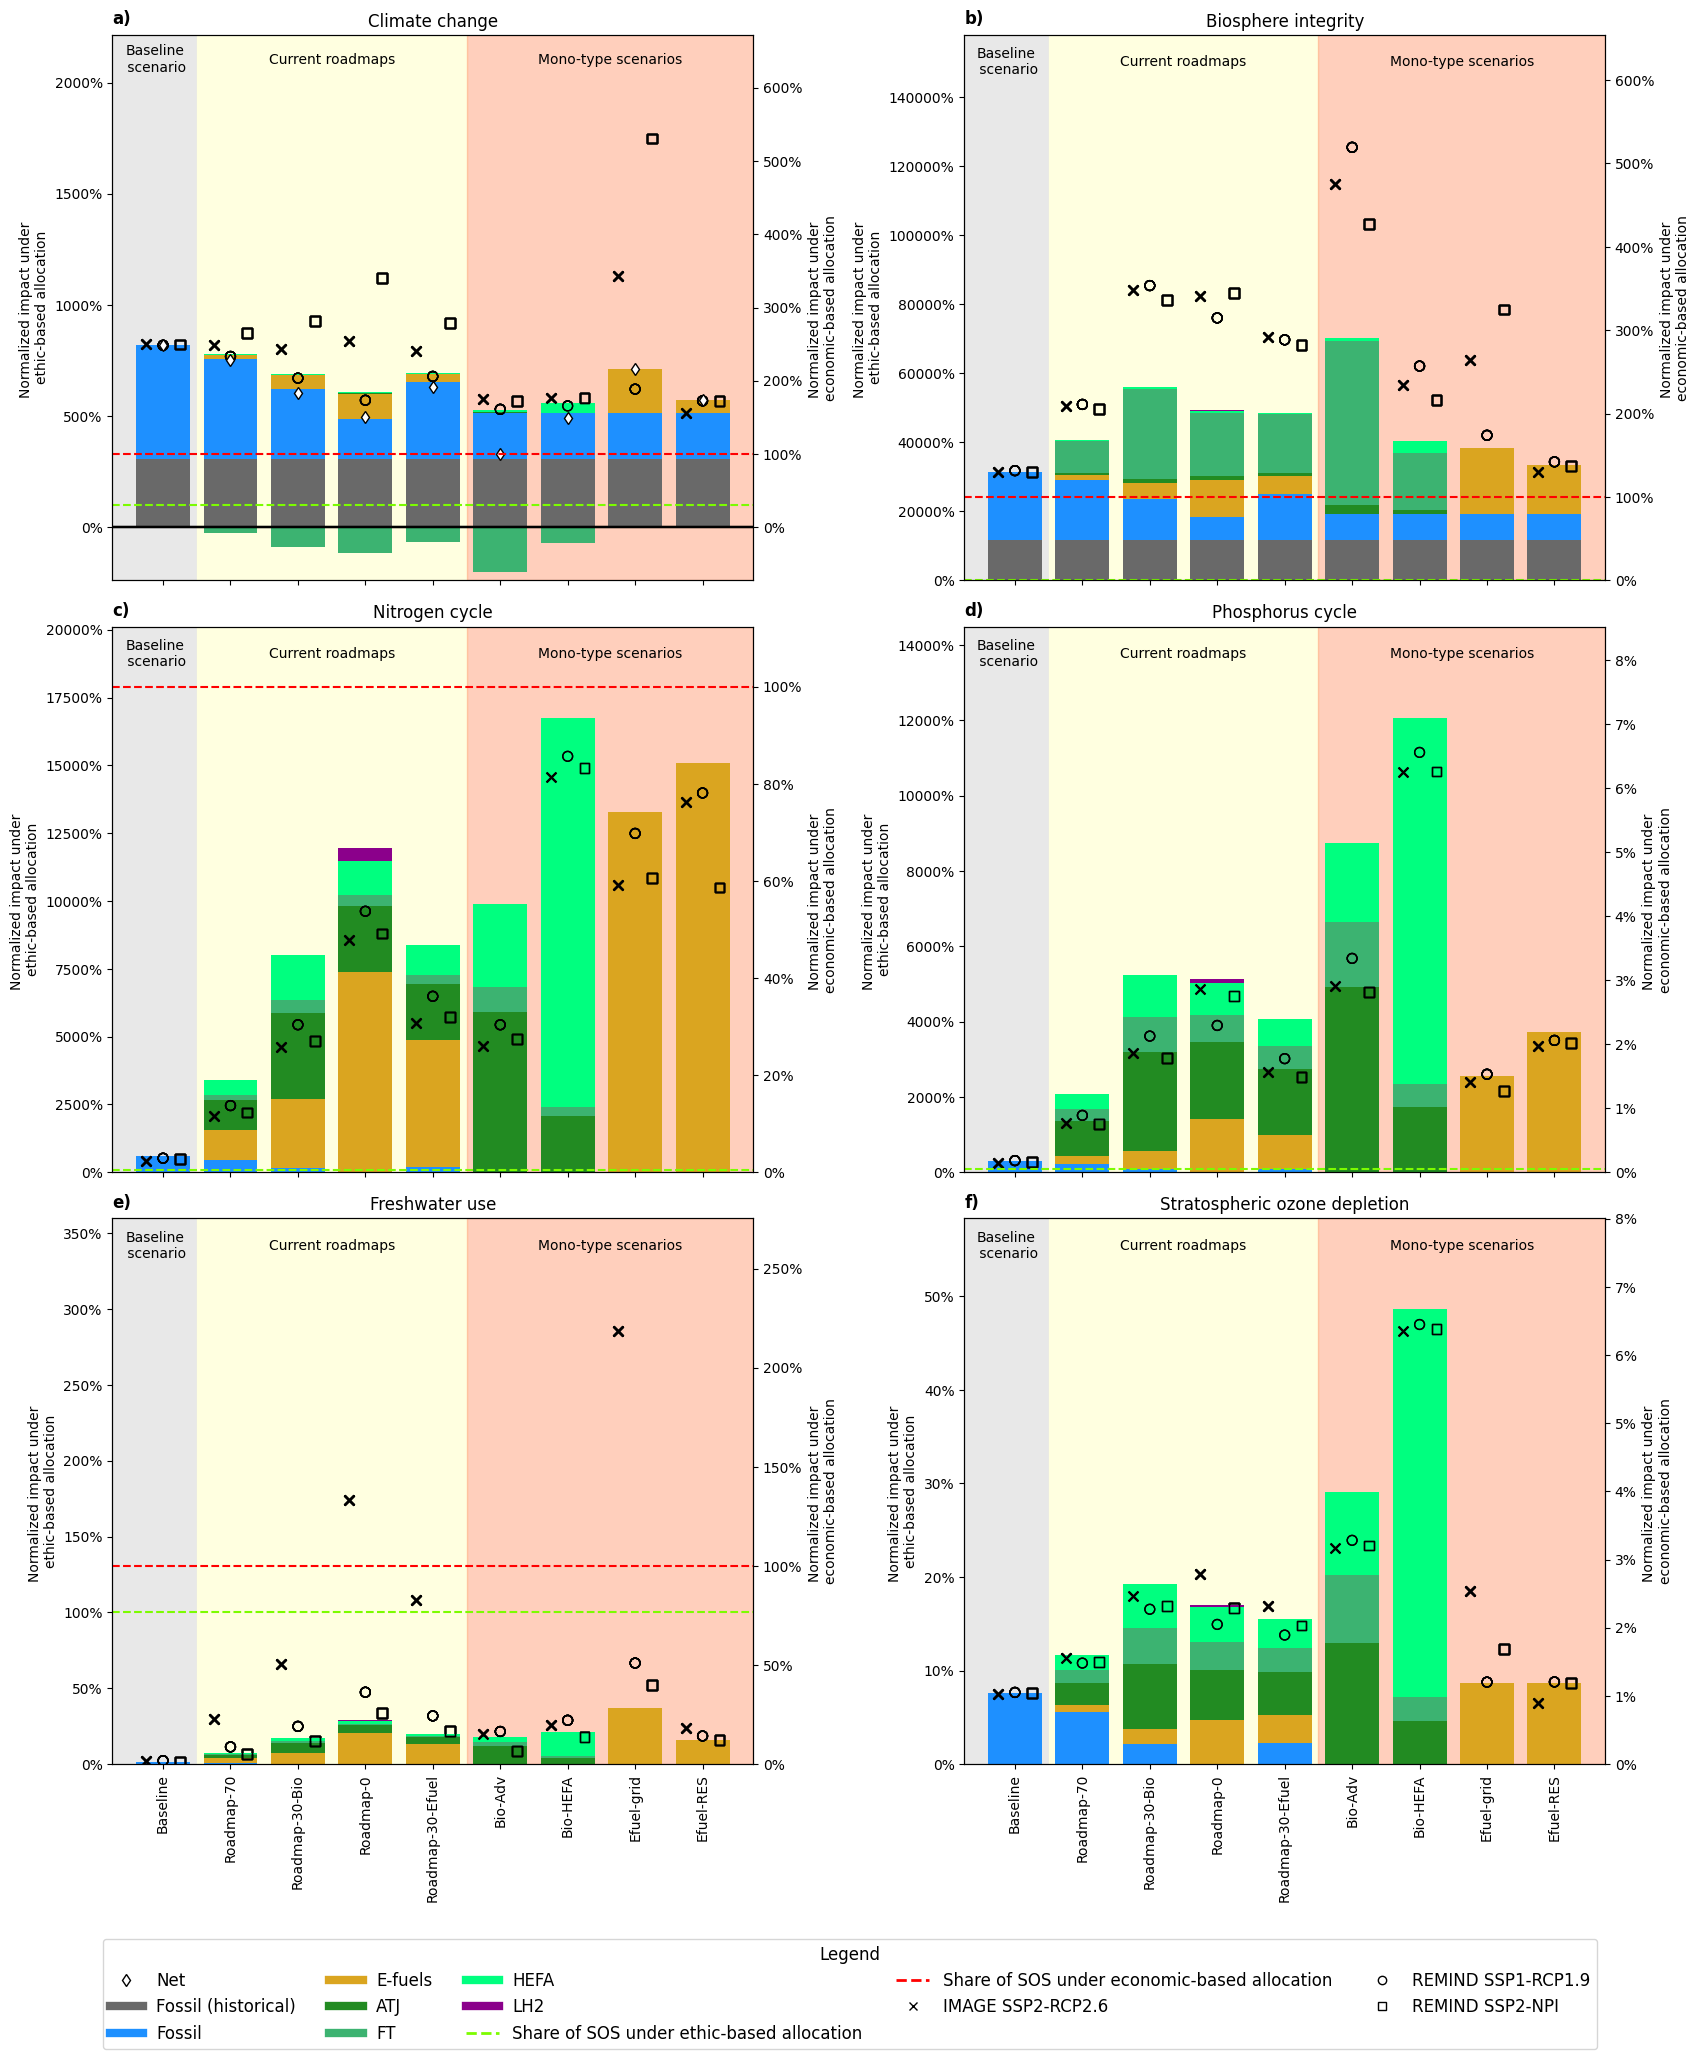

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Define the scenarios and fuel types
scenarios = ['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
fuel_types = ['fk_historical', 'fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
PBs = ['RF', 'BItot', 'N', 'P', 'FWU', 'SOD']
impact_name=['Climate change', 'Biosphere integrity', 'Nitrogen cycle', 'Phosphorus cycle','Freshwater use', 'Stratospheric ozone depletion']
colors = ['dimgrey', 'dodgerblue', 'goldenrod', 'forestgreen', 'mediumseagreen', 'springgreen', 'darkmagenta', 'seagreen', 'darkmagenta']
xlabels=['Baseline', 'Roadmap-70', 'Roadmap-30-Bio', 'Roadmap-0', 'Roadmap-30-Efuel', 'Bio-Adv', 'Bio-HEFA', 'Efuel-grid', 'Efuel-RES']
# Initialize the figure and axis
fig, axes = plt.subplots(3, 2, figsize=(17.1, 19.2), sharex=True)

# Add indices (a, b, c...) for each figure
indices = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
for i, ax in enumerate(axes.flatten()):
    ax.text(0, 1.02, f'{indices[i]})', transform=ax.transAxes, size=12, weight='bold')
axes = axes.flatten()

for j, PB in enumerate(PBs):
        # Add colored background for x between 0 and 0.5
    axes[j].axvspan(-0.75, 0.5, color='lightgrey', alpha=0.5)
    axes[j].axvspan(0.5, 4.5, color='lightyellow', alpha=1)
    axes[j].axvspan(4.5, 8.75, color='lightsalmon', alpha=0.5)
    axes[j].set_xlim(-0.75, 8.75)
    bottom_pos = np.zeros(len(scenarios))
    bottom_neg = np.zeros(len(scenarios))
    for i, fuel_type in enumerate(fuel_types):
        values = [dict_AESA[scenario][fuel_type][PB][27] for scenario in scenarios]
        if PB == 'RF':
            pos_values = [v if v > 0 else 0 for v in values]
            neg_values = [v if v < 0 else 0 for v in values]
            axes[j].bar(scenarios, pos_values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            axes[j].bar(scenarios, neg_values, bottom=bottom_neg, label=fuel_type, color=colors[i])
            bottom_pos += np.array(pos_values)
            bottom_neg += np.array(neg_values)
            axes[j].axhline(y=0, color='black')
        else:
            axes[j].bar(scenarios, values, bottom=bottom_pos, label=fuel_type, color=colors[i])
            bottom_pos += np.array(values)
        axes[j].scatter(np.arange(len(scenarios))-0.25, data_image_ssp2_rcp26[PB].tolist(), color='k', marker='x', s=50, label='IMAGE SSP2-RCP2.6')
        axes[j].scatter(np.arange(len(scenarios)), data_remind_ssp1_rcp19[PB].tolist(), color='k', marker='o', s=50, label='REMIND SSP1-RCP1.9', facecolors='none', edgecolors='k')
        axes[j].scatter(np.arange(len(scenarios))+0.25, data_remind_ssp2_npi[PB].tolist(), color='k', marker='s', s=50, label='REMIND SSP2-NPI', facecolors='none', edgecolors='k')
    if PB == 'RF':
        net_sum = bottom_pos + bottom_neg
        axes[j].plot(scenarios, net_sum, marker='d', markerfacecolor='w', linestyle='None', label='Net Sum', markeredgecolor='k')
    axes[j].set_xticklabels(xlabels, rotation=90)
    
   

    axes[j].set_ylabel('Normalized impact under \nethic-based allocation')
    axes[j].set_title(f'{impact_name[j]}')
    axes[j].set_ylim(top=axes[j].get_ylim()[1] * 1.2, bottom=axes[j].get_ylim()[0] * 1.2)
    ax2 = axes[j].twinx()
    ax2.set_ylim(axes[j].get_ylim()[0] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB], axes[j].get_ylim()[1] * PB_aviation_FHN[PB] / PB_aviation_GDP[PB])
    
    axes[j].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    
    
    ax2.set_ylabel('Normalized impact under \neconomic-based allocation')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    axes[j].axhline(y=1, color='lawngreen', linewidth=1.5, linestyle='--', label='Share of SOS under FHN')
    ax2.axhline(y=1, color='red', linewidth=1.5, linestyle='--', label='Share of SOS under GDP')
    axes[j].text(-0.125, axes[j].get_ylim()[1] *0.95, 'Baseline\n scenario', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(2.5, axes[j].get_ylim()[1] *0.95, 'Current roadmaps', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
    axes[j].text(6.625, axes[j].get_ylim()[1] *0.95, 'Mono-type scenarios', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')


from matplotlib.container import ErrorbarContainer
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

# Custom legend
custom_bar = [plt.Line2D([0], [0], color='w', lw=6, marker='d', linestyle='None', markeredgecolor='k'),
              plt.Line2D([0], [0], color='dimgrey', lw=6),
              plt.Line2D([0], [0], color='dodgerblue', lw=6),
              plt.Line2D([0], [0], color='goldenrod', lw=6),
              plt.Line2D([0], [0], color='forestgreen', lw=6),
              plt.Line2D([0], [0], color='mediumseagreen', lw=6),
              plt.Line2D([0], [0], color='springgreen', lw=6),
              plt.Line2D([0], [0], color='darkmagenta', lw=6),
            
              plt.Line2D([0], [0], color='lawngreen', lw=2, linestyle='--'),
              plt.Line2D([0], [0], color='red', lw=2, linestyle='--'),
              plt.Line2D([0], [0], color='k', marker='x', linestyle='None', markeredgecolor='k'),
                plt.Line2D([0], [0], color='k', marker='o', linestyle='None', markeredgecolor='k', markerfacecolor='none'),
                plt.Line2D([0], [0], color='k', marker='s', linestyle='None', markeredgecolor='k', markerfacecolor='none')]

custom_labels = ['Net','Fossil (historical)', 'Fossil', 'E-fuels', 'ATJ', 'FT', 'HEFA', 'LH2','Share of SOS under ethic-based allocation', 'Share of SOS under economic-based allocation', 'IMAGE SSP2-RCP2.6', 'REMIND SSP1-RCP1.9', 'REMIND SSP2-NPI']
fig.legend(custom_bar, custom_labels, loc='center', ncol=5, bbox_to_anchor=(0.5, -0.04), title='Legend', fontsize='large', title_fontsize='large')


# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('FigSI10.pdf', bbox_inches='tight', dpi=300)
plt.show()



### Figure 6

In [ ]:
data_IAM=pd.read_excel('19_Resources_CC_selection.xlsx', sheet_name='Data')

In [ ]:
data_IAM.set_index(data_IAM.columns[0], inplace=True)
data_IAM.columns = data_IAM.iloc[0]
data_IAM = data_IAM[1:]

In [ ]:
data_remind_ssp2_npi = data_IAM.loc[:, data_IAM.columns == 'REMIND SSP2-NPi']
data_remind_ssp1_rcp19 = data_IAM.loc[:, data_IAM.columns == 'REMIND SSP1-RCP1.9']
data_image_ssp2_rcp26 = data_IAM.loc[:, data_IAM.columns == 'IMAGE SSP2-RCP2.6']
data_remind_ssp2_rcp26 = data_IAM.loc[:, data_IAM.columns == 'REMIND SSP2-RCP2.6']
all_data=[data_remind_ssp2_npi,data_remind_ssp1_rcp19,data_image_ssp2_rcp26]

In [ ]:
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.lines import Line2D

import matplotlib.pyplot as plt

# Define the scenarios and fuel types
scenarios = ['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
xlabels=['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS-bio-Adv', 'MTS-bio-HEFA', 'MTS-efuel-grid', 'MTS-efuel-RES']
fuel_types = ['FK', 'efuels', 'ATJ', 'FT', 'HEFA', 'LH2']
colors = ['dodgerblue', 'goldenrod', 'forestgreen', 'mediumseagreen', 'springgreen', 'darkmagenta']

# Initialize the figure and axis
fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True)
for ax in fig.axes:
    ax.axvspan(-0.75, 0.5, color='lightgrey', alpha=0.5)
    ax.axvspan(0.5, 4.5, color='lightyellow', alpha=1)
    ax.axvspan(4.5, 8.75, color='lightsalmon', alpha=0.5)
    ax.set_xlim(-0.75, 8.75)

# Plot a) Electricity and biomass
axes[0, 0].text(0, 1.01, 'a)', transform=axes[0, 0].transAxes, size=15, weight='normal')
axes[0, 1].text(-0, 1.01, 'b)', transform=axes[0, 1].transAxes, size=15, weight='normal')
axes[1, 0].text(-0, 1.01, 'c)', transform=axes[1, 0].transAxes, size=15, weight='normal')
axes[1, 1].text(-0, 1.01, 'd)', transform=axes[1, 1].transAxes, size=15, weight='normal')

ax = axes[0, 0]
bottom_biomass = np.zeros(len(scenarios))
bottom_electricity = np.zeros(len(scenarios))
indices = np.arange(len(scenarios))
barwidth = 0.40
for i, fuel_type in enumerate(fuel_types):
    values_biomass = [dict_biomass[scenario][fuel_type]['value'] for scenario in scenarios]
    values_elec = [dict_electricity[scenario][fuel_type]['value']*3.6 for scenario in scenarios]
    ax.bar(indices + barwidth / 2, values_biomass, bottom=bottom_biomass, label=fuel_type, color=colors[i], width=barwidth, edgecolor='black')
    ax.bar(indices - barwidth / 2, values_elec, bottom=bottom_electricity, label=fuel_type, color=colors[i], width=barwidth, hatch='//', edgecolor='black')
    bottom_biomass += np.array(values_biomass)
    bottom_electricity += np.array(values_elec)
ax.set_ylabel('Final electricity and biomass demand (EJ)')
ax.set_title('2050 aviation biomass and electricity demand')
ax.scatter(indices-barwidth/2, data_remind_ssp1_rcp19.iloc[:,0]*3.6e-12, color='black', marker='o', label='Remind SSP1-PkBudg500', facecolors='none', s=50)
ax.scatter(indices-barwidth/2-0.15, data_remind_ssp2_npi.iloc[:,0]*3.6e-12, color='black', marker='s', label='Remind SSP2-Npi', facecolors='none', s=50)
ax.scatter(indices-barwidth/2+0.15, data_image_ssp2_rcp26.iloc[:,0]*3.6e-12, color='black', marker='x', label='Image SSP2-RCP26', s=50)
ax.scatter(indices+barwidth/2, data_remind_ssp1_rcp19.iloc[:,1]*1e-12, color='black', marker='o', facecolors='none', s=50)
ax.scatter(indices+barwidth/2-0.15, data_remind_ssp2_npi.iloc[:,1]*1e-12, color='black', marker='s', facecolors='none', s=50)
ax.scatter(indices+barwidth/2+0.15, data_image_ssp2_rcp26.iloc[:,1]*1e-12, color='black', marker='x', s=50)
ax.set_ylim(0, ax.get_ylim()[1] * 1.05)

ax.set_xticks(indices)
ax.set_xticklabels(xlabels, rotation=90)
from matplotlib.patches import Patch

custom_patches = [Patch(facecolor='white', edgecolor='black', label='Biomass'),
                  Patch(facecolor='white', edgecolor='black', hatch='//', label='Electricity')]
ax.legend(handles=custom_patches, loc='upper left')

# Plot b) Land occupation
ax = axes[0, 1]
bottom_biomass = np.zeros(len(scenarios))
for i, fuel_type in enumerate(fuel_types):
    values_biomass = [land_occupation_biomass[scenario][fuel_type] * 1e-6 for scenario in scenarios]
    ax.bar(scenarios, values_biomass, bottom=bottom_biomass, label=fuel_type, color=colors[i], edgecolor='black')
    bottom_biomass += np.array(values_biomass)
bottom_electricity = bottom_biomass.copy()
for i, fuel_type in enumerate(fuel_types):
    values_electricity = [land_occupation_electricity[scenario][fuel_type] * 1e-6  for scenario in scenarios]
    ax.bar(scenarios, values_electricity, bottom=bottom_biomass, label=fuel_type, color=colors[i], hatch='//',edgecolor='k')
    bottom_biomass += np.array(values_electricity)
ax.set_ylabel('Land occupation (mega-km²)')
ax.set_title('Land occupation by 2050 aviation')
ax.scatter(indices, data_remind_ssp1_rcp19.iloc[:,4], color='black', marker='o', label='Remind SSP1-PkBudg500', facecolors='none', s=50)
ax.scatter(indices-0.15, data_remind_ssp2_npi.iloc[:,4], color='black', marker='s', label='Remind SSP2-Npi', facecolors='none', s=50)
ax.scatter(indices+0.15, data_image_ssp2_rcp26.iloc[:,4], color='black', marker='x', label='Image SSP2-RCP26', s=50)
ax.set_ylim(0, ax.get_ylim()[1] * 1.05)

ax.set_xticklabels(xlabels, rotation=90)
custom_patches = [Patch(facecolor='white', edgecolor='black', label='Biomass cultivation'),
                  Patch(facecolor='white', edgecolor='black', hatch='//', label='Electricity production')]
ax.legend(handles=custom_patches, loc='upper left')

# Plot c) Freshwater withdrawal
ax = axes[1, 0]
bottom = np.zeros(len(scenarios))
for i, fuel_type in enumerate(fuel_types):
    values = [freshwater_withdrawal[scenario][fuel_type] for scenario in scenarios]
    ax.bar(scenarios, values, bottom=bottom, label=fuel_type, color=colors[i],edgecolor='k')
    bottom += np.array(values)
ax.set_ylabel('Freshwater withdrawal (km³)')
ax.scatter(indices, data_remind_ssp1_rcp19.iloc[:,6], color='black', marker='o', label='Remind SSP1-PkBudg500', facecolors='none', s=50)
ax.scatter(indices-0.15, data_remind_ssp2_npi.iloc[:,6], color='black', marker='s', label='Remind SSP2-Npi', facecolors='none', s=50)
ax.scatter(indices+0.15, data_image_ssp2_rcp26.iloc[:,6], color='black', marker='x', label='Image SSP2-RCP26', s=50)
ax.set_title('Freshwater withdrawal by 2050 aviation')
ax.set_ylim(0, ax.get_ylim()[1] * 1.05)
ax.set_xticks(indices)
ax.set_xticklabels(xlabels, rotation=90)

# Plot d) DAC
ax = axes[1, 1]
bottom = np.zeros(len(scenarios))
values = [eval(f"scenario_{scenario}")[1][27] * DAC_per_MJ_PtL*1e-9 for scenario in scenarios]
ax.bar(scenarios, values, bottom=bottom, label='efuels', color='goldenrod',edgecolor='k')
bottom += np.array(values)
ax.set_ylabel('Direct air capture (MtCO2)')
ax.scatter(indices, data_remind_ssp1_rcp19.iloc[:,8], color='black', marker='o', label='Remind SSP1-PkBudg500', facecolors='none', s=50)
ax.scatter(indices-0.15, data_remind_ssp2_npi.iloc[:,8], color='black', marker='s', label='Remind SSP2-Npi', facecolors='none', s=50)
ax.scatter(indices+0.15, data_image_ssp2_rcp26.iloc[:,8], color='black', marker='x', label='Image SSP2-RCP26', s=50)
ax.set_title('Direct air capture by 2050 aviation')
ax.set_ylim(0, ax.get_ylim()[1] * 1.05)
ax.set_xticks(indices)
ax.set_xticklabels(xlabels, rotation=90)

for i in range(2):
    for j in range(2):
        ax=axes[j,i]
        if j==1:
            ax.text(-0.125, ax.get_ylim()[1] *0.97, 'Baseline\n scenario', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
        else:
            ax.text(-0.125, ax.get_ylim()[1] *0.88, 'Baseline\n scenario', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
        ax.text(2.5, ax.get_ylim()[1] *0.98, 'Current roadmaps (CR)', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')
        ax.text(6.625, ax.get_ylim()[1] *0.98, 'Mono-type scenarios (MTS)', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black', weight='normal')


# Add a common custom legend behind the 4 subplots
custom_patches = [Patch(facecolor='dodgerblue', edgecolor='black', label='Fossil kerosene'),
                  Patch(facecolor='goldenrod', edgecolor='black', label='Efuel'),
                  Patch(facecolor='forestgreen', edgecolor='black', label='ATJ'),
                  Patch(facecolor='mediumseagreen', edgecolor='black', label='FT'),
                  Patch(facecolor='springgreen', edgecolor='black', label='HEFA'),
                  Patch(facecolor='darkmagenta', edgecolor='black', label='LH2'),
                  Line2D([0], [0], color='black', marker='o', label='Remind SSP1-PkBudg500', markersize=10, linestyle='None', markerfacecolor='none'),
                    Line2D([0], [0], color='black', marker='s', label='Remind SSP2-Npi', markersize=10, linestyle='None', markerfacecolor='none'),
                    Line2D([0], [0], color='black', marker='x', label='Image SSP2-RCP26', markersize=10, linestyle='None')]
labels = ['Fossil kerosene', 'E-fuels', 'ATJ', 'FT', 'HEFA', 'LH2']
fig.legend(handles=custom_patches, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=9, fontsize='large')
# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Figure 7

In [ ]:
df_remind_ssp2_rcp26 = data_remind_ssp2_rcp26.iloc[:, [2, 3, 5, 7, 9]]
df_remind_ssp1_rcp19 = data_remind_ssp1_rcp19.iloc[:, [2, 3, 5, 7, 9]]
df_remind_ssp2_npi = data_remind_ssp2_npi.iloc[:, [2, 3, 5, 7, 9]]
df_image_ssp2_rcp26 = data_image_ssp2_rcp26.iloc[:, [2, 3, 5, 7, 9]]

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt

# Define the dataframes and their corresponding column names
dataframes = [df_remind_ssp2_rcp26, df_remind_ssp1_rcp19, df_remind_ssp2_npi, df_image_ssp2_rcp26]
col_names = ['REMIND_SSP2_RCP2.6', 'REMIND_SSP1_RCP1.9', 'REMIND_SPP2_NPi', 'IMAGE_SSP2_RCP2.6']
row_names = df_remind_ssp2_rcp26.index.tolist()

# Define the number of rows and columns
rows, cols = len(row_names), len(dataframes)

# Define the number of sectors in each pie chart
num_sectors = 5

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(10, 20))


# Define a colormap
# Define discrete colors for the ranges
ranges = [(0, 0.1), (0.1, 1), (1, 10), (10, 100),(100,1000)]
discrete_colors = ['green', 'orange', 'red', 'purple','black']
cmap = ListedColormap(discrete_colors)
cmap.set_bad(color='white', alpha=1.0)  # Set NaN values to white with full opacity

# Define the radius for the pie charts
radius = 1

# Loop through each subplot

# Add a legend for the colors



for i, row_name in enumerate(row_names):
    for j, (df, col_name) in enumerate(zip(dataframes, col_names)):
        # Get the current axis
        ax = axes[i, j]

        # Get the values for the current pie chart
        values = df.loc[row_name].astype(float).values[:num_sectors]

        # Skip plotting if all values are NaN
        if np.isnan(values).all():
            ax.axis('off')  # Turn off the axis for empty plots
            continue


        # Generate colors based on normalized values
        colors = []
        for value in values:
            if np.isnan(value):
                colors.append('#FFFFFF')  # Assign hashed white color for NaN values
            else:
                for range_idx, value_range in enumerate(ranges):
                    if value_range[0] <= value < value_range[1]:
                        colors.append(discrete_colors[range_idx])
                        break

        # Create the pie chart
        wedges, _ = ax.pie([1] * num_sectors, colors=colors, radius=1, wedgeprops=dict(width=1, edgecolor='black'))

        # Add a title for the first row
        if i == 0:
            ax.set_title(col_name, fontsize=10)

        # Add a label for the first column
        if j == 0:
            ax.set_ylabel(row_name, fontsize=10, rotation=0, labelpad=40, va='center')

        # Remove the axis for better visualization
        ax.axis('equal')

legend_labels = ['0-10%', '10-100%', '100-1 000%', '1 000-10 000%', '10 000-100 000%']
fig.legend(handles=[plt.Line2D([0], [0], color=color, lw=4) for color in discrete_colors],
           labels=legend_labels, loc='upper center', ncol=len(discrete_colors), fontsize=10, bbox_to_anchor=(0.5, 0.92))
#plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to make room for the legend
plt.subplots_adjust(wspace=-0.3, hspace=0)  # Minimize space between columns and rows
# Show the plot
plt.show()

### Figure 8

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
markers=['$RF$', '$BI$', '$N$', '$P$', '$LSC$', '$FWU$', '$SOD$']
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'darkred', 'firebrick', 'crimson', 'tomato', 'salmon']
xlabels=['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS-bio-Adv', 'MTS-bio-HEFA', 'MTS-efuel-grid', 'MTS-efuel-RES']
# Add custom sector behind y=-0.1

for scenario in scenarios:
    a=-0.1
    for PB in PBs:
        plt.bar(scenario, results[scenario][PB]-a, bottom=a, edgecolor='black', color=colors[PBs.index(PB)])
        a=results[scenario][PB]
        if PB=='RF' and results[scenario][PB]==-0.1:
            plt.scatter(scenario, -0.1375, color='black', marker='$RF$')  
        elif PB=='BItot' and results[scenario][PB]==-0.1:
            plt.scatter(scenario, -0.1375, color='black', marker='$BI$')
        elif results[scenario][PB]==-0.1:
            plt.scatter(scenario, -0.1125, color='black', marker=markers[PBs.index(PB)])
        else:
            plt.scatter(scenario, results[scenario][PB], color='black', marker=markers[PBs.index(PB)])
plt.axhspan(-0.1, -0.125, color='lightgrey', alpha=0.5)
plt.axhline(y=-0.1, color='black', linestyle='-')
plt.axhline(y=-0.125, color='black', linestyle='-')
plt.axhline(y=-0.15, color='black', linestyle='-')
plt.axhspan(-0.125, -0.15, color='lightgrey', alpha=0.5)
plt.text(-0.9, -0.1375, 'Historical', horizontalalignment='right', verticalalignment='center', fontsize=10, color='black', weight='normal')
plt.text(-0.9, -0.1125, 'Below -10.0%', horizontalalignment='right', verticalalignment='center', fontsize=10, color='black', weight='normal')
plt.axhline(y=0.037, color='r', linestyle='--')


plt.xticks(scenarios, xlabels, rotation=90)
plt.yticks(np.arange(-0.1, 0.125, 0.025))
plt.ylim(-0.15, 0.1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.show()

## Fig SI 3

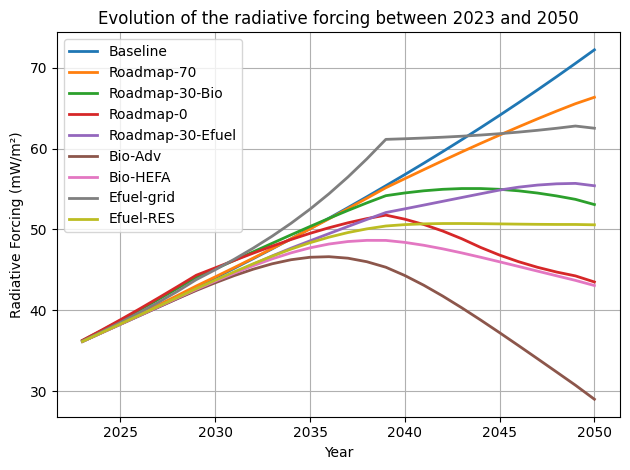

In [699]:
import matplotlib.pyplot as plt

# Define the scenarios and years
scenarios = ['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
years = list(range(2023, 2051))
historical_period = list(range(1940, 2024))
fuel_types = ['fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
colors = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'grey']
labels=['Baseline', 'Roadmap-70', 'Roadmap-30-Bio', 'Roadmap-0', 'Roadmap-30-Efuel', 'Bio-Adv', 'Bio-HEFA', 'Efuel-grid', 'Efuel-RES']


# Calculate and plot the total RF (sum of all fuels + historical) for each scenario from 2023 to 2050
for i, scenario in enumerate(scenarios):
    total_rf = [sum([dict_impacts[scenario][fuel_type]['RF'][j] for fuel_type in ['fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']]) + dict_impacts[scenario]['fk_historical']['RF'][j] for j in range(len(years))]
    plt.plot(years, [rf*1000 for rf in total_rf], label=labels[i], linewidth=2)

plt.grid()    

plt.legend(loc='upper left', ncol=1)
plt.ylabel('Radiative Forcing (mW/m²)')
plt.xlabel('Year')
plt.title('Evolution of the radiative forcing between 2023 and 2050')
plt.tight_layout()
#plt.savefig('FigSI2.svg', bbox_inches='tight', dpi=300)
plt.show()

In [701]:
import pandas as pd

# Prepare the data for export
df_total_rf = pd.DataFrame({'Year': years})
for scenario in scenarios:
    total_rf_scenario = [sum([dict_impacts[scenario][fuel_type]['RF'][j] for fuel_type in ['fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']]) + dict_impacts[scenario]['fk_historical']['RF'][j] for j in range(len(years))]
    df_total_rf[scenario] = [rf * 1000 for rf in total_rf_scenario]  # mW/m²

# Export to Excel
df_total_rf.to_excel('total_rf_2023_2050_all_scenarios.xlsx', index=False)

## Fig SI 4

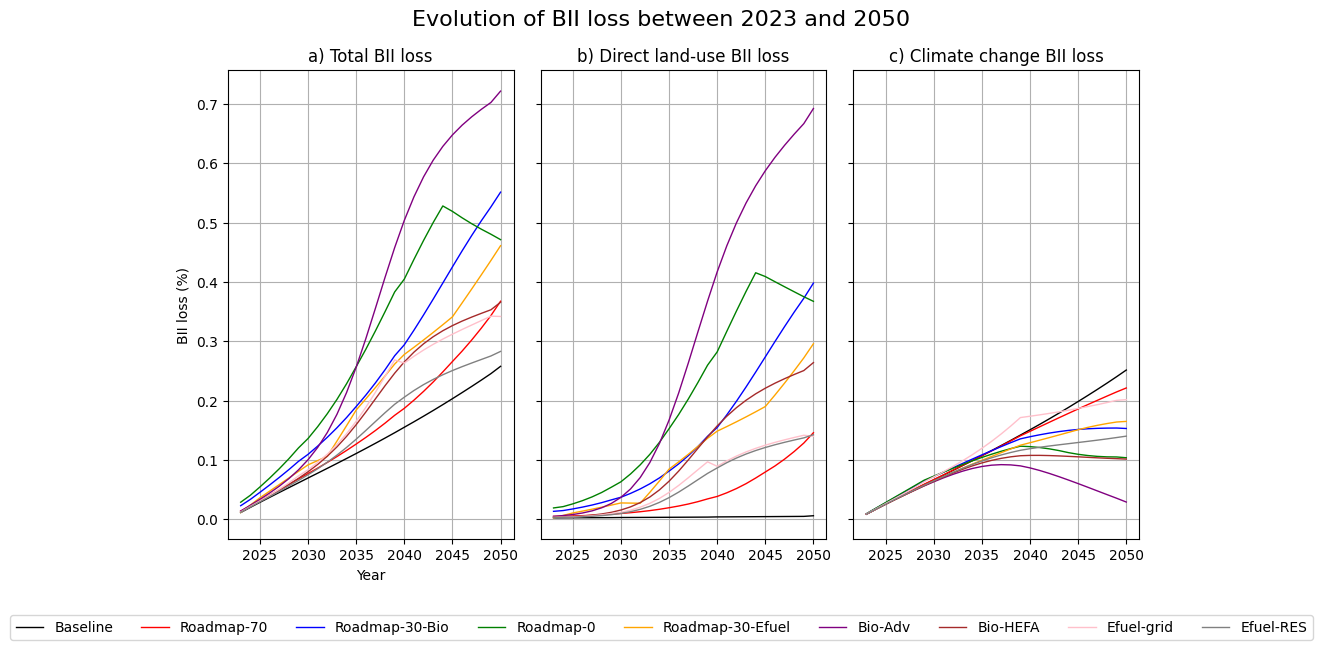

In [703]:
import matplotlib.pyplot as plt

# Define the scenarios and years
scenarios = ['Baseline', 'CR1', 'CR2', 'CR3', 'CR4', 'MTS1', 'MTS2', 'MTS3', 'MTS4']
years = list(range(2023, 2051))
fuel_types = ['fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']
colors = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'grey']

# Initialize the figure and axis
fig, ax = plt.subplots(1, 3, figsize=(10, 6), sharey=True)

# Plot the RF evolution for each scenario
for scenario in scenarios:
    bi_values = []
    bi_dlu_values = []
    bi_rf_values = []
    for year in range(len(years)):
        bi_value = sum(dict_impacts[scenario][fuel_type]['BItot'][year] for fuel_type in fuel_types) + historical_bii[year]
        bi_values.append(bi_value)
        bi_dlu_value= sum(dict_impacts[scenario][fuel_type]['BIIDLU'][year] for fuel_type in fuel_types)
        bi_dlu_values.append(bi_dlu_value)
        bi_rf_value= sum(dict_impacts[scenario][fuel_type]['BIrf'][year] for fuel_type in fuel_types)+historical_bii[year]
        bi_rf_values.append(bi_rf_value)

    ax[0].plot(years, bi_values, label=scenario, color=colors[scenarios.index(scenario)], linewidth=1)
    ax[1].plot(years, bi_dlu_values, label=f"{scenario} - Land use", linestyle='-', color=colors[scenarios.index(scenario)], linewidth=1)
    ax[2].plot(years, bi_rf_values, label=f"{scenario} - Climate change", linestyle='-', color=colors[scenarios.index(scenario)], linewidth=1)

# Add labels and title
ax[0].set_xlabel('Year')
ax[0].set_ylabel('BII loss (%)')
ax[0].set_title('a) Total BII loss')
ax[0].grid(True)


ax[1].grid(True)
ax[1].set_title('b) Direct land-use BII loss')


ax[2].grid(True)
ax[2].set_title('c) Climate change BII loss')


# Display the plot
# Add a common legend behind the three figures

handles, labels = ax[0].get_legend_handles_labels()
labels=['Baseline', 'Roadmap-70', 'Roadmap-30-Bio', 'Roadmap-0', 'Roadmap-30-Efuel', 'Bio-Adv', 'Bio-HEFA', 'Efuel-grid', 'Efuel-RES']
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=9)
fig.suptitle('Evolution of BII loss between 2023 and 2050', fontsize=16)
plt.tight_layout()
plt.savefig('FigSI4.svg', bbox_inches='tight', dpi=300)
plt.show()

In [704]:
import pandas as pd

# Prepare the data for export
years = list(range(2023, 2051))
fuel_types = ['fk', 'efuels', 'atj', 'ft', 'hefa', 'lh2']

bi_dict = {'Year': years}
bi_dlu_dict = {'Year': years}
bi_rf_dict = {'Year': years}

for scenario in scenarios:
    bi_values = []
    bi_dlu_values = []
    bi_rf_values = []
    for year in range(len(years)):
        bi_value = sum(dict_impacts[scenario][fuel_type]['BItot'][year] for fuel_type in fuel_types) + historical_bii[year]
        bi_values.append(bi_value)
        bi_dlu_value = sum(dict_impacts[scenario][fuel_type]['BIIDLU'][year] for fuel_type in fuel_types)
        bi_dlu_values.append(bi_dlu_value)
        bi_rf_value = sum(dict_impacts[scenario][fuel_type]['BIrf'][year] for fuel_type in fuel_types) + historical_bii[year]
        bi_rf_values.append(bi_rf_value)
    bi_dict[scenario] = bi_values
    bi_dlu_dict[scenario] = bi_dlu_values
    bi_rf_dict[scenario] = bi_rf_values

df_bi = pd.DataFrame(bi_dict)
df_bi_dlu = pd.DataFrame(bi_dlu_dict)
df_bi_rf = pd.DataFrame(bi_rf_dict)

df_bi.to_excel('bi_2023_2050_all_scenarios.xlsx', index=False)
df_bi_dlu.to_excel('bi_dlu_2023_2050_all_scenarios.xlsx', index=False)
df_bi_rf.to_excel('bi_rf_2023_2050_all_scenarios.xlsx', index=False)